In [23]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
sns.set_style("whitegrid")


In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, steps):
    X, y = list(), list()
    for start in range(len(sequence)):
        # define the end index of sequence
        end_index = start + steps
        # to check if end_index stays in the allowable limit
        if end_index > len(sequence)-1:
          break
        # extract input and output parts of the sequence
        sequence_x, sequence_y = sequence[start : end_index], sequence[end_index]
        X.append(sequence_x)
        y.append(sequence_y)
    return array(X), array(y)


In [9]:
# get Data From CSV File 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [31]:
OCHL = ['Open', 'Close', 'High', 'Low']
OCHLV = ['Open', 'Close', 'High', 'Low', 'Volume']

In [10]:
# Read Data From CSV Files 
# there are three data sets for the Stocks from IT sector called TCS, Infosys and NIFTY IT
tcs_data = pd.read_csv('tcs_stock.csv')
pd.concat([tcs_data.head(),tcs_data.tail()])

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/01/2015,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674340e+13,8002,52870,0.2883
1,2/01/2015,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,5/01/2015,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248890e+14,43234,456728,0.5207
3,6/01/2015,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989620e+14,84503,714306,0.5894
4,7/01/2015,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208360e+14,101741,886368,0.6724
243,24/12/2015,TCS,EQ,2425.80,2421.00,2438.20,2404.00,2435.00,2434.25,2424.03,421580,1.021920e+14,21932,188670,0.4475
244,28/12/2015,TCS,EQ,2434.25,2428.00,2466.40,2420.20,2456.95,2462.70,2455.00,1852099,4.546900e+14,43390,1060100,0.5724
245,29/12/2015,TCS,EQ,2462.70,2458.35,2465.30,2445.75,2449.35,2455.80,2452.26,854262,2.094880e+14,26975,433986,0.5080
246,30/12/2015,TCS,EQ,2455.80,2453.05,2459.00,2412.30,2421.70,2418.30,2442.06,802881,1.960680e+14,49464,632180,0.7874
247,31/12/2015,TCS,EQ,2418.30,2415.75,2448.50,2407.50,2430.00,2436.85,2428.90,620159,1.506300e+14,42600,400391,0.6456


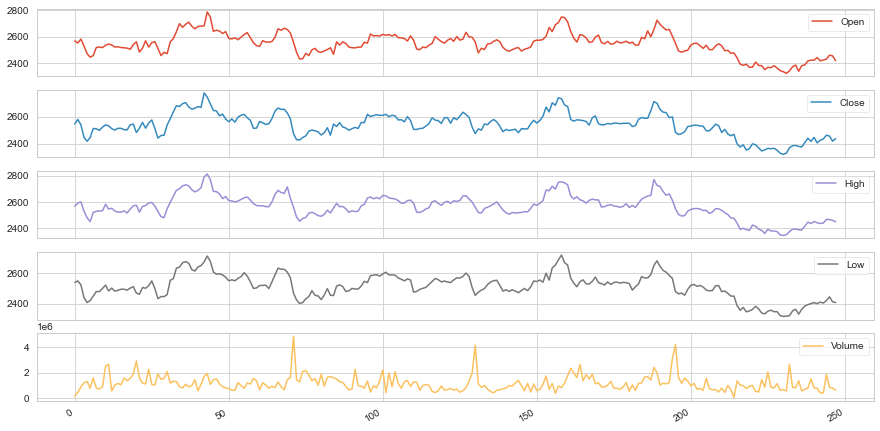

In [36]:
tcs_data[OCHLV].plot(legend=True,subplots=True, figsize = (15, 8))
plt.show()

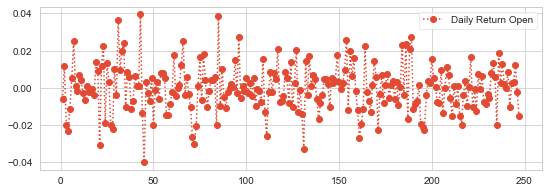

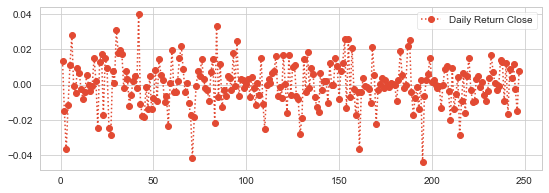

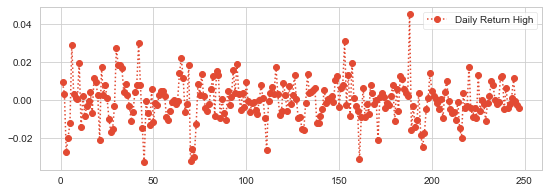

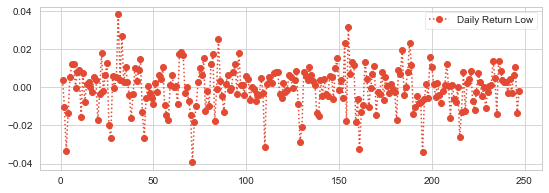

In [38]:
for x in OCHL:
    tcs_data['Daily Return '+x] = tcs_data[x].pct_change()
    # plot the daily return percentage
    tcs_data['Daily Return '+x].plot(figsize=(9,3),legend=True,linestyle=':',marker='o')
    plt.show()

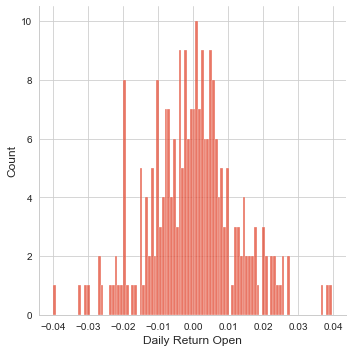

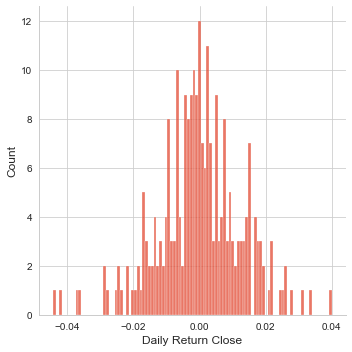

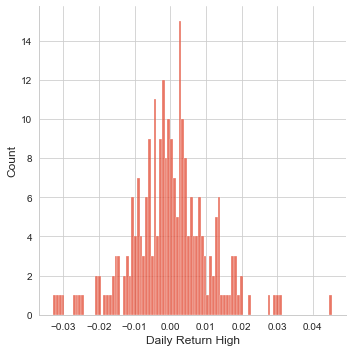

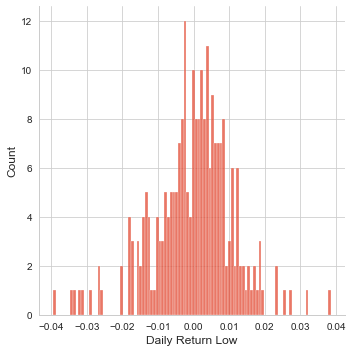

In [79]:
sns.displot(tcs_data['Daily Return Open'], bins=100)
sns.displot(tcs_data['Daily Return Close'], bins=100)
sns.displot(tcs_data['Daily Return High'],bins=100)
sns.displot(tcs_data['Daily Return Low'], bins=100)
plt.show()


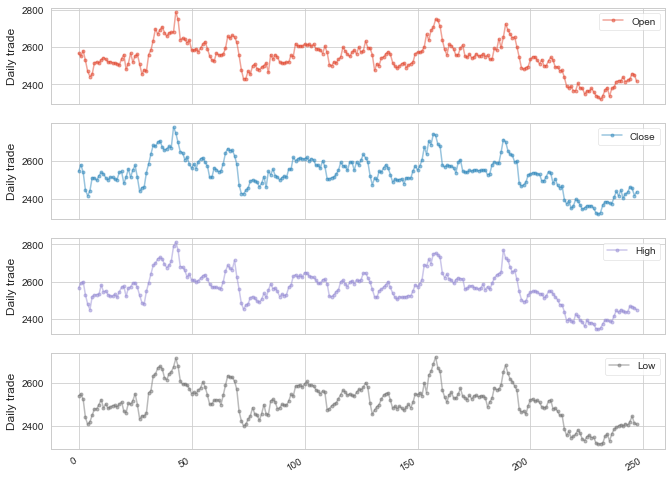

In [80]:
axes = tcs_data[OCHL].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [81]:
infosys_data = pd.read_csv('infy_stock.csv')
pd.concat([infosys_data.head(),infosys_data.tail()])

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/01/2015,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870310e+13,14908,258080,0.5154
1,2/01/2015,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394670e+14,54166,1249104,0.7371
2,5/01/2015,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979910e+14,82694,1830962,0.7370
3,6/01/2015,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724460e+14,108209,1772070,0.7332
4,7/01/2015,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557160e+14,62463,1317720,0.7270
243,24/12/2015,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739700e+13,20528,294731,0.4792
244,28/12/2015,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055050e+14,51103,1880078,0.6803
245,29/12/2015,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846710e+14,52409,967577,0.5785
246,30/12/2015,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.00,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808
247,31/12/2015,INFY,EQ,1086.30,1090.15,1109.95,1087.0,1107.00,1105.40,1102.09,3971969,4.377470e+14,75143,2641827,0.6651


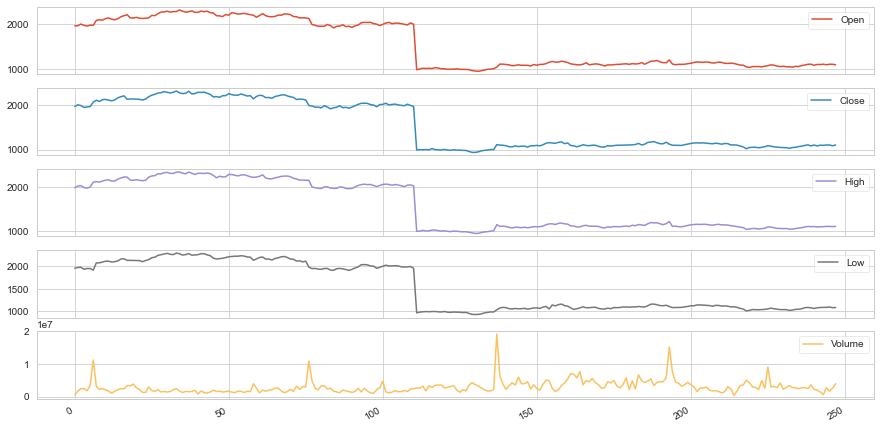

In [83]:
infosys_data[OCHLV].plot(legend=True,subplots=True, figsize = (15, 8))
plt.show()

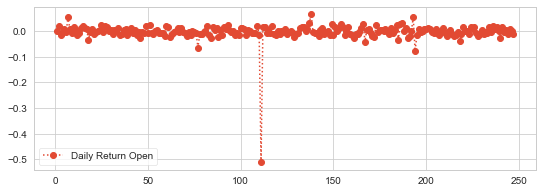

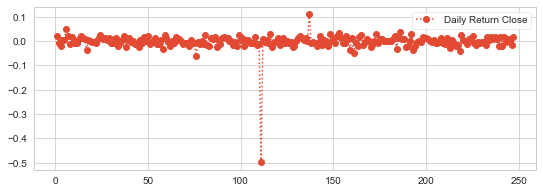

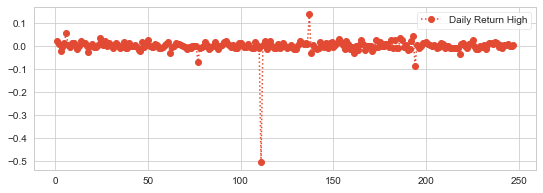

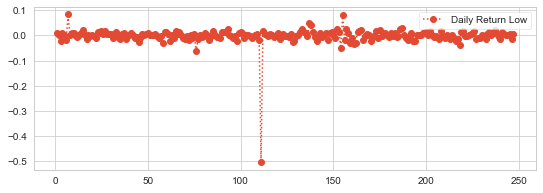

In [84]:
for x in OCHL:
    infosys_data['Daily Return '+x] = infosys_data[x].pct_change()
    # plot the daily return percentage
    infosys_data['Daily Return '+x].plot(figsize=(9,3),legend=True,linestyle=':',marker='o')
    plt.show()


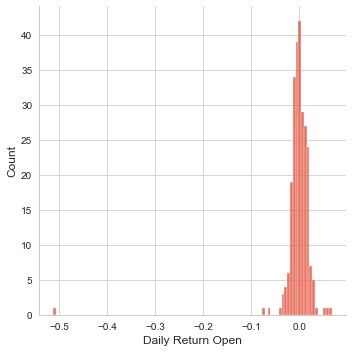

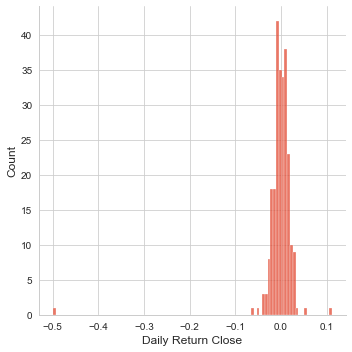

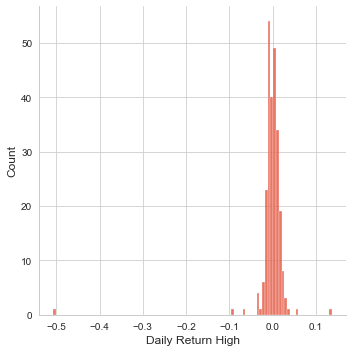

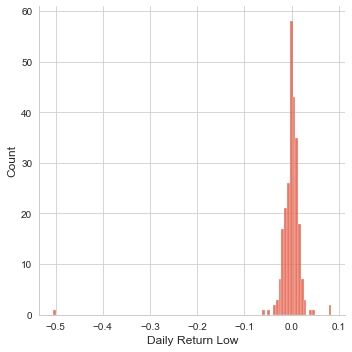

In [85]:
sns.displot(infosys_data['Daily Return Open'], bins=100)
sns.displot(infosys_data['Daily Return Close'], bins=100)
sns.displot(infosys_data['Daily Return High'],bins=100)
sns.displot(infosys_data['Daily Return Low'], bins=100)
plt.show()

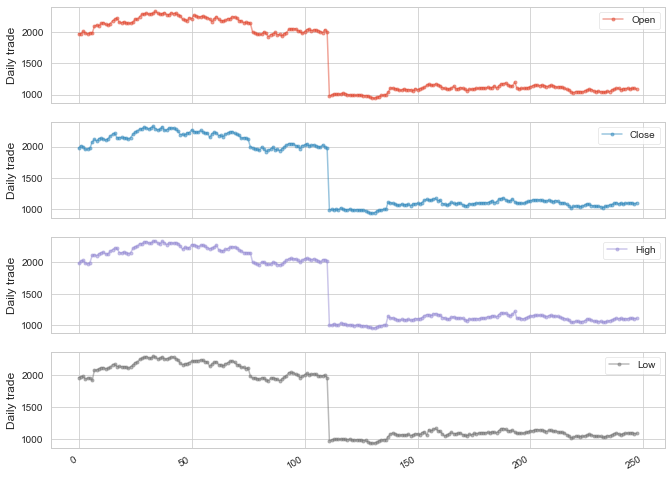

In [86]:
axes = infosys_data[OCHL].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [87]:
nifty_it_data = pd.read_csv('nifty_it_index.csv')
pd.concat([nifty_it_data.head(),nifty_it_data.tail()])

,Date,Open,High,Low,Close,Volume,Turnover
0,1/01/2015,11214.80,11235.75,11166.35,11215.70,4246150,3575100000
1,2/01/2015,11214.65,11399.10,11214.65,11372.10,10004862,9645600000
2,5/01/2015,11369.35,11433.75,11186.95,11248.55,8858018,10590000000
3,6/01/2015,11186.10,11186.10,10909.00,10959.90,12515739,13645000000
4,7/01/2015,11013.20,11042.35,10889.55,10916.00,10976356,12034400000
243,24/12/2015,11193.25,11197.50,11152.85,11184.90,2927864,3182700000
244,28/12/2015,11152.70,11303.05,11146.85,11271.80,8055590,10019000000
245,29/12/2015,11257.05,11287.50,11206.60,11253.45,6024174,6626200000
246,30/12/2015,11247.35,11263.60,11100.10,11117.60,6564991,7071900000
247,31/12/2015,11113.00,11233.85,11113.00,11212.55,8197040,8590500000


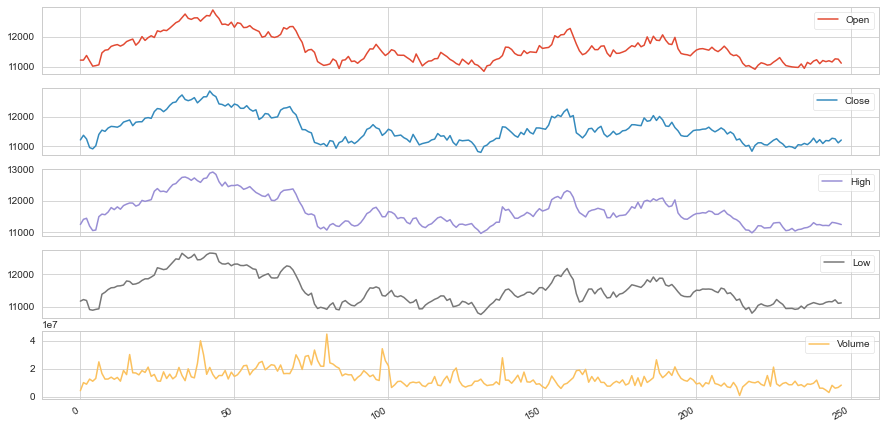

In [88]:
nifty_it_data[OCHLV].plot(legend=True,subplots=True, figsize = (15, 8))
plt.show()


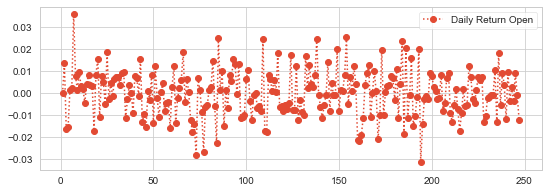

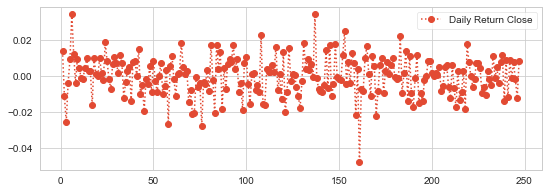

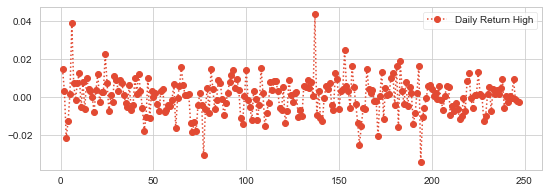

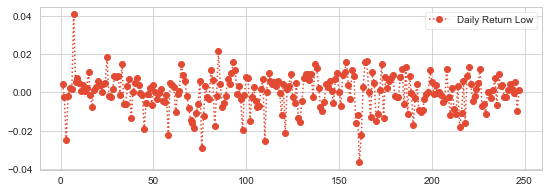

In [89]:
for x in OCHL:
    nifty_it_data['Daily Return '+x] = nifty_it_data[x].pct_change()
    # plot the daily return percentage
    nifty_it_data['Daily Return '+x].plot(figsize=(9,3),legend=True,linestyle=':',marker='o')
    plt.show()

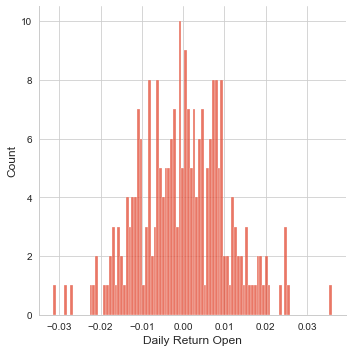

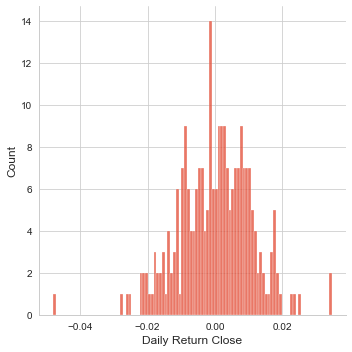

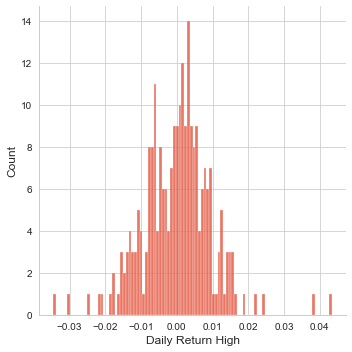

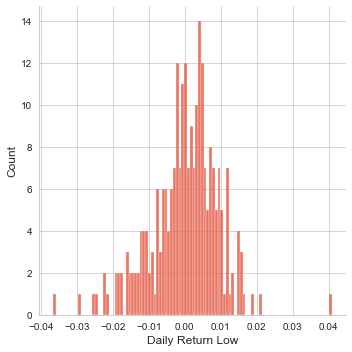

In [90]:
sns.displot(nifty_it_data['Daily Return Open'], bins=100)
sns.displot(nifty_it_data['Daily Return Close'], bins=100)
sns.displot(nifty_it_data['Daily Return High'],bins=100)
sns.displot(nifty_it_data['Daily Return Low'], bins=100)
plt.show()

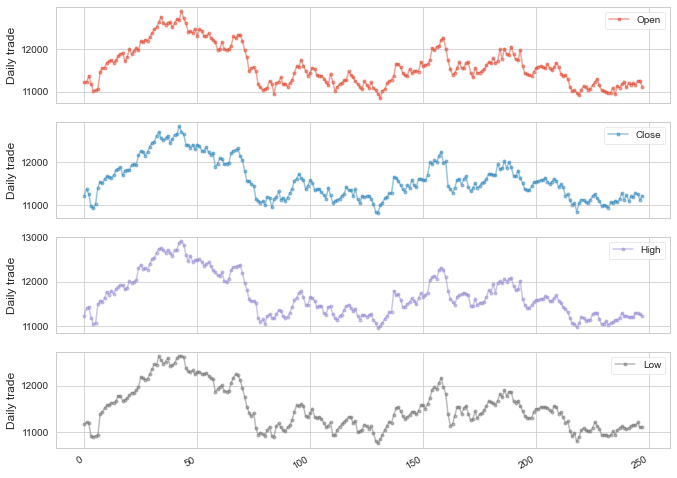

In [91]:
axes = nifty_it_data[OCHL].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [92]:
# information fo the data
# and check EDA for the data for more information while its contains the null information of missing values ?
#  having bad perdiction if we have wrong data or null values 
#  also printing the decription for the data, coz it is containing the data type of data whether it is object or float which is very important
#  Checking NULL values 
print(tcs_data.info())
print(tcs_data.describe())
print(tcs_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
 15  Daily Return        247 non-null    float64
 16  Daily Re

In [93]:
# information fo the data
# and check EDA for the data for more information while its contains the null information of missing values ?
#  having bad perdiction if we have wrong data or null values 
#  also printing the decription for the data, coz it is containing the data type of data whether it is object or float which is very important
#  Checking NULL values 
print(infosys_data.info())
print(infosys_data.describe())
print(infosys_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
 15  Daily Return Open   247 non-null    float64
 16  Daily Re

In [9]:
# information fo the data
# and check EDA for the data for more information while its contains the null information of missing values ?
#  having bad perdiction if we have wrong data or null values 
#  also printing the decription for the data, coz it is containing the data type of data whether it is object or float which is very important
#  Checking NULL values 
print(nifty_it_data.info())
print(nifty_it_data.describe())
print(nifty_it_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      248 non-null    object 
 1   Open      248 non-null    float64
 2   High      248 non-null    float64
 3   Low       248 non-null    float64
 4   Close     248 non-null    float64
 5   Volume    248 non-null    int64  
 6   Turnover  248 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 13.7+ KB
None
               Open          High           Low         Close        Volume  \
count    248.000000    248.000000    248.000000    248.000000  2.480000e+02   
mean   11601.495968  11673.756250  11505.632056  11585.626613  1.383053e+07   
std      468.997883    472.763542    462.203401    466.678465  6.401886e+06   
min    10840.650000  10950.250000  10759.850000  10798.250000  7.952400e+05   
25%    11214.762500  11268.200000  11133.312500  11210.200000  9.304708e+06   
50%

# TCS Data Split in to Open Close High and Low 
# list for process for split 

In [94]:
# Split data of tcs in open close high and low different series 
tcs_open_raw_sequence = tcs_data['Open'].tolist()
tcs_close_raw_sequence = tcs_data['Close'].tolist()
tcs_high_raw_sequence = tcs_data['High'].tolist()
tcs_low_raw_sequence = tcs_data['Low'].tolist()

# Inforsys Data Split in to Open Close High and Low 
# list for process for split 

In [95]:
# Split data of infosys in open close high and low different series 
infosys_open_raw_sequence = infosys_data['Open'].tolist()
infosys_close_raw_sequence = infosys_data['Close'].tolist()
infosys_high_raw_sequence = infosys_data['High'].tolist()
infosys_low_raw_sequence = infosys_data['Low'].tolist()

# Nifty Index data split in to Open Close High and low
## list for process for split ahead

In [96]:
# Split data of infosys in open close high and low different series 
niftyit_open_raw_sequence = nifty_it_data['Open'].tolist()
niftyit_close_raw_sequence = nifty_it_data['Close'].tolist()
niftyit_high_raw_sequence = nifty_it_data['High'].tolist()
niftyit_low_raw_sequence = nifty_it_data['Low'].tolist()

In [104]:
steps = 25
X1, y1 = split_sequence(tcs_open_raw_sequence, steps)
X2, y2 = split_sequence(tcs_close_raw_sequence, steps)
X3, y3 = split_sequence(tcs_high_raw_sequence, steps)
X4, y4 = split_sequence(tcs_low_raw_sequence, steps)
X5, y5 = split_sequence(infosys_open_raw_sequence, steps)
X6, y6 = split_sequence(infosys_close_raw_sequence, steps)
X7, y7 = split_sequence(infosys_high_raw_sequence, steps)
X8, y8 = split_sequence(infosys_low_raw_sequence, steps)
X9, y9 = split_sequence(niftyit_open_raw_sequence, steps)
X10, y10 = split_sequence(niftyit_close_raw_sequence, steps)
X11, y11 = split_sequence(niftyit_high_raw_sequence, steps)
X12, y12 = split_sequence(niftyit_low_raw_sequence, steps)


In [105]:
# reshape 2D input data to 3D input data
features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], features))
X2 = X2.reshape((X2.shape[0], X2.shape[1], features))
X3 = X3.reshape((X3.shape[0], X3.shape[1], features))
X4 = X4.reshape((X4.shape[0], X4.shape[1], features))
X5 = X5.reshape((X5.shape[0], X5.shape[1], features))
X6 = X6.reshape((X6.shape[0], X6.shape[1], features))
X7 = X7.reshape((X7.shape[0], X7.shape[1], features))
X8 = X8.reshape((X8.shape[0], X8.shape[1], features))
X9 = X9.reshape((X9.shape[0], X9.shape[1], features))
X10 = X10.reshape((X10.shape[0], X10.shape[1], features))
X11 = X11.reshape((X11.shape[0], X11.shape[1], features))
X12 = X12.reshape((X12.shape[0], X12.shape[1], features))

In [132]:
# choose a number of time steps
steps = 25

# split into samples
X, y = split_sequence(X1, steps)

In [106]:
# Defining model Architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               76900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 77,193
Trainable params: 77,193
Non-trainable params: 0
_________________________________________________________________


In [108]:
X1.shape

(223, 25, 1)

In [109]:
y1.shape

(223,)

In [167]:
# fit model# fit model
history = model.fit(X1, y1, epochs=10000, batch_size=40, verbose=1, shuffle =True)

Epoch 1/10000
6/6 [==============================] - 0s 2ms/step - loss: 1150.7114
Epoch 2/10000
6/6 [==============================] - 0s 3ms/step - loss: 1058.8358
Epoch 3/10000
6/6 [==============================] - 0s 3ms/step - loss: 1159.5935
Epoch 4/10000
6/6 [==============================] - 0s 2ms/step - loss: 1028.6630
Epoch 5/10000
6/6 [==============================] - 0s 3ms/step - loss: 1014.5043
Epoch 6/10000
6/6 [==============================] - 0s 3ms/step - loss: 991.2901
Epoch 7/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.4127
Epoch 8/10000
6/6 [==============================] - 0s 3ms/step - loss: 1027.7023
Epoch 9/10000
6/6 [==============================] - 0s 3ms/step - loss: 1099.7262
Epoch 10/10000
6/6 [==============================] - 0s 3ms/step - loss: 994.9110
Epoch 11/10000
6/6 [==============================] - 0s 3ms/step - loss: 1001.7186
Epoch 12/10000
6/6 [==============================] - 0s 3ms/step - loss: 1046.9147
Epoc

6/6 [==============================] - 0s 3ms/step - loss: 1341.3647
Epoch 99/10000
6/6 [==============================] - 0s 3ms/step - loss: 1369.8176
Epoch 100/10000
6/6 [==============================] - 0s 3ms/step - loss: 1207.9495
Epoch 101/10000
6/6 [==============================] - 0s 2ms/step - loss: 1243.5278
Epoch 102/10000
6/6 [==============================] - 0s 2ms/step - loss: 1255.1486
Epoch 103/10000
6/6 [==============================] - 0s 2ms/step - loss: 1392.1812
Epoch 104/10000
6/6 [==============================] - 0s 2ms/step - loss: 1302.3330
Epoch 105/10000
6/6 [==============================] - 0s 2ms/step - loss: 1114.0605
Epoch 106/10000
6/6 [==============================] - 0s 2ms/step - loss: 1001.0429
Epoch 107/10000
6/6 [==============================] - 0s 2ms/step - loss: 1156.9558
Epoch 108/10000
6/6 [==============================] - 0s 2ms/step - loss: 1210.1277
Epoch 109/10000
6/6 [==============================] - 0s 3ms/step - loss: 1189.66

6/6 [==============================] - 0s 2ms/step - loss: 1036.2507
Epoch 195/10000
6/6 [==============================] - 0s 3ms/step - loss: 1157.0367
Epoch 196/10000
6/6 [==============================] - 0s 3ms/step - loss: 1037.2054
Epoch 197/10000
6/6 [==============================] - 0s 3ms/step - loss: 1017.1270
Epoch 198/10000
6/6 [==============================] - 0s 3ms/step - loss: 1006.2368
Epoch 199/10000
6/6 [==============================] - 0s 3ms/step - loss: 1158.5299
Epoch 200/10000
6/6 [==============================] - 0s 3ms/step - loss: 1223.8365
Epoch 201/10000
6/6 [==============================] - 0s 3ms/step - loss: 1204.1857
Epoch 202/10000
6/6 [==============================] - 0s 3ms/step - loss: 1041.6824
Epoch 203/10000
6/6 [==============================] - 0s 2ms/step - loss: 1095.4612
Epoch 204/10000
6/6 [==============================] - 0s 2ms/step - loss: 1013.2879
Epoch 205/10000
6/6 [==============================] - 0s 2ms/step - loss: 1009.5

6/6 [==============================] - 0s 3ms/step - loss: 1070.6045
Epoch 291/10000
6/6 [==============================] - 0s 3ms/step - loss: 998.2623
Epoch 292/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.8306
Epoch 293/10000
6/6 [==============================] - 0s 3ms/step - loss: 1026.0978
Epoch 294/10000
6/6 [==============================] - 0s 2ms/step - loss: 1077.6384
Epoch 295/10000
6/6 [==============================] - 0s 2ms/step - loss: 1162.9476
Epoch 296/10000
6/6 [==============================] - 0s 2ms/step - loss: 1372.3815
Epoch 297/10000
6/6 [==============================] - 0s 2ms/step - loss: 1388.7424
Epoch 298/10000
6/6 [==============================] - 0s 2ms/step - loss: 1399.7264
Epoch 299/10000
6/6 [==============================] - 0s 2ms/step - loss: 1129.4646
Epoch 300/10000
6/6 [==============================] - 0s 3ms/step - loss: 1080.3625
Epoch 301/10000
6/6 [==============================] - 0s 2ms/step - loss: 1111.420

6/6 [==============================] - 0s 2ms/step - loss: 1119.4175
Epoch 387/10000
6/6 [==============================] - 0s 2ms/step - loss: 1276.7064
Epoch 388/10000
6/6 [==============================] - 0s 2ms/step - loss: 1011.9169
Epoch 389/10000
6/6 [==============================] - 0s 2ms/step - loss: 1021.1949
Epoch 390/10000
6/6 [==============================] - 0s 3ms/step - loss: 1100.2506
Epoch 391/10000
6/6 [==============================] - 0s 2ms/step - loss: 1152.9648
Epoch 392/10000
6/6 [==============================] - 0s 2ms/step - loss: 1049.0469
Epoch 393/10000
6/6 [==============================] - 0s 2ms/step - loss: 1113.8190
Epoch 394/10000
6/6 [==============================] - 0s 2ms/step - loss: 1139.0802
Epoch 395/10000
6/6 [==============================] - 0s 2ms/step - loss: 1170.8837
Epoch 396/10000
6/6 [==============================] - 0s 2ms/step - loss: 1140.2314
Epoch 397/10000
6/6 [==============================] - 0s 2ms/step - loss: 1108.2

6/6 [==============================] - 0s 3ms/step - loss: 1444.7123
Epoch 483/10000
6/6 [==============================] - 0s 3ms/step - loss: 1432.0304
Epoch 484/10000
6/6 [==============================] - 0s 3ms/step - loss: 1202.4960
Epoch 485/10000
6/6 [==============================] - 0s 2ms/step - loss: 1263.8041
Epoch 486/10000
6/6 [==============================] - 0s 2ms/step - loss: 1209.1821
Epoch 487/10000
6/6 [==============================] - 0s 2ms/step - loss: 1197.1864
Epoch 488/10000
6/6 [==============================] - 0s 2ms/step - loss: 1176.8899
Epoch 489/10000
6/6 [==============================] - 0s 2ms/step - loss: 1105.1525
Epoch 490/10000
6/6 [==============================] - 0s 2ms/step - loss: 987.2140
Epoch 491/10000
6/6 [==============================] - 0s 2ms/step - loss: 1166.0927
Epoch 492/10000
6/6 [==============================] - 0s 2ms/step - loss: 1357.4451
Epoch 493/10000
6/6 [==============================] - 0s 2ms/step - loss: 1209.63

6/6 [==============================] - 0s 2ms/step - loss: 1121.5248
Epoch 579/10000
6/6 [==============================] - 0s 2ms/step - loss: 1018.4066
Epoch 580/10000
6/6 [==============================] - 0s 2ms/step - loss: 1146.6290
Epoch 581/10000
6/6 [==============================] - 0s 3ms/step - loss: 1350.8872
Epoch 582/10000
6/6 [==============================] - 0s 3ms/step - loss: 1021.7920
Epoch 583/10000
6/6 [==============================] - 0s 2ms/step - loss: 1073.4165
Epoch 584/10000
6/6 [==============================] - 0s 2ms/step - loss: 1095.5311
Epoch 585/10000
6/6 [==============================] - 0s 2ms/step - loss: 993.5250
Epoch 586/10000
6/6 [==============================] - 0s 2ms/step - loss: 1176.9602
Epoch 587/10000
6/6 [==============================] - 0s 2ms/step - loss: 1362.3198
Epoch 588/10000
6/6 [==============================] - 0s 2ms/step - loss: 1180.4860
Epoch 589/10000
6/6 [==============================] - 0s 2ms/step - loss: 1202.15

6/6 [==============================] - 0s 2ms/step - loss: 1141.6608
Epoch 675/10000
6/6 [==============================] - 0s 2ms/step - loss: 1102.7368
Epoch 676/10000
6/6 [==============================] - 0s 2ms/step - loss: 1044.8798
Epoch 677/10000
6/6 [==============================] - 0s 3ms/step - loss: 1261.6101
Epoch 678/10000
6/6 [==============================] - 0s 3ms/step - loss: 1300.9994
Epoch 679/10000
6/6 [==============================] - 0s 3ms/step - loss: 1086.0332
Epoch 680/10000
6/6 [==============================] - 0s 3ms/step - loss: 1067.3961
Epoch 681/10000
6/6 [==============================] - 0s 2ms/step - loss: 1054.8135
Epoch 682/10000
6/6 [==============================] - 0s 2ms/step - loss: 978.0233
Epoch 683/10000
6/6 [==============================] - 0s 2ms/step - loss: 1025.7756
Epoch 684/10000
6/6 [==============================] - 0s 2ms/step - loss: 1419.0701
Epoch 685/10000
6/6 [==============================] - 0s 2ms/step - loss: 1416.61

6/6 [==============================] - 0s 2ms/step - loss: 1092.3737
Epoch 771/10000
6/6 [==============================] - 0s 2ms/step - loss: 1079.3936
Epoch 772/10000
6/6 [==============================] - 0s 3ms/step - loss: 1121.4086
Epoch 773/10000
6/6 [==============================] - 0s 2ms/step - loss: 1181.4937
Epoch 774/10000
6/6 [==============================] - 0s 2ms/step - loss: 1018.1586
Epoch 775/10000
6/6 [==============================] - 0s 2ms/step - loss: 997.4005
Epoch 776/10000
6/6 [==============================] - 0s 3ms/step - loss: 1006.5767
Epoch 777/10000
6/6 [==============================] - 0s 3ms/step - loss: 1073.3278
Epoch 778/10000
6/6 [==============================] - 0s 3ms/step - loss: 1008.4518
Epoch 779/10000
6/6 [==============================] - 0s 2ms/step - loss: 1290.6200
Epoch 780/10000
6/6 [==============================] - 0s 2ms/step - loss: 1195.1613
Epoch 781/10000
6/6 [==============================] - 0s 2ms/step - loss: 1303.36

Epoch 867/10000
6/6 [==============================] - 0s 2ms/step - loss: 977.9708
Epoch 868/10000
6/6 [==============================] - 0s 2ms/step - loss: 1052.3486
Epoch 869/10000
6/6 [==============================] - 0s 2ms/step - loss: 963.7087
Epoch 870/10000
6/6 [==============================] - 0s 2ms/step - loss: 967.3490
Epoch 871/10000
6/6 [==============================] - 0s 2ms/step - loss: 1002.6066
Epoch 872/10000
6/6 [==============================] - 0s 2ms/step - loss: 1128.1118
Epoch 873/10000
6/6 [==============================] - 0s 2ms/step - loss: 982.1652
Epoch 874/10000
6/6 [==============================] - 0s 2ms/step - loss: 939.2896
Epoch 875/10000
6/6 [==============================] - 0s 2ms/step - loss: 988.4351
Epoch 876/10000
6/6 [==============================] - 0s 2ms/step - loss: 984.0231
Epoch 877/10000
6/6 [==============================] - 0s 2ms/step - loss: 951.2491
Epoch 878/10000
6/6 [==============================] - 0s 2ms/step - loss

6/6 [==============================] - 0s 2ms/step - loss: 961.6329
Epoch 964/10000
6/6 [==============================] - 0s 2ms/step - loss: 977.4859
Epoch 965/10000
6/6 [==============================] - 0s 2ms/step - loss: 1010.2846
Epoch 966/10000
6/6 [==============================] - 0s 3ms/step - loss: 1165.0586
Epoch 967/10000
6/6 [==============================] - 0s 2ms/step - loss: 1141.0023
Epoch 968/10000
6/6 [==============================] - 0s 2ms/step - loss: 1003.8876
Epoch 969/10000
6/6 [==============================] - 0s 2ms/step - loss: 976.2600
Epoch 970/10000
6/6 [==============================] - 0s 2ms/step - loss: 1017.2205
Epoch 971/10000
6/6 [==============================] - 0s 2ms/step - loss: 1002.4675
Epoch 972/10000
6/6 [==============================] - 0s 2ms/step - loss: 1028.6604
Epoch 973/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.4918
Epoch 974/10000
6/6 [==============================] - 0s 2ms/step - loss: 1026.5094


6/6 [==============================] - 0s 2ms/step - loss: 1025.0344
Epoch 1060/10000
6/6 [==============================] - 0s 2ms/step - loss: 1087.7325
Epoch 1061/10000
6/6 [==============================] - 0s 2ms/step - loss: 945.0752
Epoch 1062/10000
6/6 [==============================] - 0s 2ms/step - loss: 1024.4955
Epoch 1063/10000
6/6 [==============================] - 0s 2ms/step - loss: 911.5700
Epoch 1064/10000
6/6 [==============================] - 0s 2ms/step - loss: 1199.5868
Epoch 1065/10000
6/6 [==============================] - 0s 2ms/step - loss: 948.3188
Epoch 1066/10000
6/6 [==============================] - 0s 2ms/step - loss: 1074.6943
Epoch 1067/10000
6/6 [==============================] - 0s 2ms/step - loss: 974.4983
Epoch 1068/10000
6/6 [==============================] - 0s 2ms/step - loss: 942.1041
Epoch 1069/10000
6/6 [==============================] - 0s 2ms/step - loss: 971.5562
Epoch 1070/10000
6/6 [==============================] - 0s 2ms/step - loss: 1

6/6 [==============================] - 0s 3ms/step - loss: 1086.8231
Epoch 1155/10000
6/6 [==============================] - 0s 3ms/step - loss: 955.6655
Epoch 1156/10000
6/6 [==============================] - 0s 2ms/step - loss: 999.1490
Epoch 1157/10000
6/6 [==============================] - 0s 2ms/step - loss: 981.1656
Epoch 1158/10000
6/6 [==============================] - 0s 2ms/step - loss: 915.2861
Epoch 1159/10000
6/6 [==============================] - 0s 3ms/step - loss: 972.5997
Epoch 1160/10000
6/6 [==============================] - 0s 2ms/step - loss: 1023.4334
Epoch 1161/10000
6/6 [==============================] - 0s 3ms/step - loss: 1259.4281
Epoch 1162/10000
6/6 [==============================] - 0s 3ms/step - loss: 1060.5656
Epoch 1163/10000
6/6 [==============================] - 0s 3ms/step - loss: 1312.5641
Epoch 1164/10000
6/6 [==============================] - 0s 3ms/step - loss: 1419.2573
Epoch 1165/10000
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 982.4342
Epoch 1250/10000
6/6 [==============================] - 0s 3ms/step - loss: 972.2648
Epoch 1251/10000
6/6 [==============================] - 0s 3ms/step - loss: 930.5482
Epoch 1252/10000
6/6 [==============================] - 0s 3ms/step - loss: 934.3896
Epoch 1253/10000
6/6 [==============================] - 0s 3ms/step - loss: 992.0335
Epoch 1254/10000
6/6 [==============================] - 0s 3ms/step - loss: 926.0497
Epoch 1255/10000
6/6 [==============================] - 0s 3ms/step - loss: 919.2496
Epoch 1256/10000
6/6 [==============================] - 0s 3ms/step - loss: 970.7286
Epoch 1257/10000
6/6 [==============================] - 0s 3ms/step - loss: 1010.0943
Epoch 1258/10000
6/6 [==============================] - 0s 3ms/step - loss: 1067.6346
Epoch 1259/10000
6/6 [==============================] - 0s 2ms/step - loss: 1118.0326
Epoch 1260/10000
6/6 [==============================] - 0s 2ms/step - loss: 112

6/6 [==============================] - 0s 3ms/step - loss: 960.9607
Epoch 1345/10000
6/6 [==============================] - 0s 3ms/step - loss: 954.8448
Epoch 1346/10000
6/6 [==============================] - 0s 3ms/step - loss: 1265.8690
Epoch 1347/10000
6/6 [==============================] - 0s 3ms/step - loss: 1081.2521
Epoch 1348/10000
6/6 [==============================] - 0s 3ms/step - loss: 1014.8624
Epoch 1349/10000
6/6 [==============================] - 0s 3ms/step - loss: 898.8405
Epoch 1350/10000
6/6 [==============================] - 0s 3ms/step - loss: 981.6360
Epoch 1351/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.2418
Epoch 1352/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.3889
Epoch 1353/10000
6/6 [==============================] - 0s 3ms/step - loss: 926.6284
Epoch 1354/10000
6/6 [==============================] - 0s 2ms/step - loss: 913.7287
Epoch 1355/10000
6/6 [==============================] - 0s 3ms/step - loss: 982

6/6 [==============================] - 0s 3ms/step - loss: 1052.4263
Epoch 1441/10000
6/6 [==============================] - 0s 3ms/step - loss: 1066.5450
Epoch 1442/10000
6/6 [==============================] - 0s 3ms/step - loss: 1144.1519
Epoch 1443/10000
6/6 [==============================] - 0s 3ms/step - loss: 1257.4714
Epoch 1444/10000
6/6 [==============================] - 0s 3ms/step - loss: 1085.9036
Epoch 1445/10000
6/6 [==============================] - 0s 3ms/step - loss: 1319.8494
Epoch 1446/10000
6/6 [==============================] - 0s 3ms/step - loss: 1005.5482
Epoch 1447/10000
6/6 [==============================] - 0s 3ms/step - loss: 968.5979
Epoch 1448/10000
6/6 [==============================] - 0s 3ms/step - loss: 966.5581
Epoch 1449/10000
6/6 [==============================] - 0s 3ms/step - loss: 1004.1837
Epoch 1450/10000
6/6 [==============================] - 0s 3ms/step - loss: 961.4826
Epoch 1451/10000
6/6 [==============================] - 0s 2ms/step - loss

6/6 [==============================] - 0s 3ms/step - loss: 934.7414
Epoch 1536/10000
6/6 [==============================] - 0s 3ms/step - loss: 977.4075
Epoch 1537/10000
6/6 [==============================] - 0s 3ms/step - loss: 1096.6696
Epoch 1538/10000
6/6 [==============================] - 0s 3ms/step - loss: 994.7454
Epoch 1539/10000
6/6 [==============================] - 0s 3ms/step - loss: 1024.2726
Epoch 1540/10000
6/6 [==============================] - 0s 3ms/step - loss: 1013.2239
Epoch 1541/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.9109
Epoch 1542/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.7828
Epoch 1543/10000
6/6 [==============================] - 0s 3ms/step - loss: 926.1126
Epoch 1544/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.9320
Epoch 1545/10000
6/6 [==============================] - 0s 3ms/step - loss: 959.4608
Epoch 1546/10000
6/6 [==============================] - 0s 3ms/step - loss: 984

6/6 [==============================] - 0s 3ms/step - loss: 1117.0850
Epoch 1631/10000
6/6 [==============================] - 0s 3ms/step - loss: 1146.2483
Epoch 1632/10000
6/6 [==============================] - 0s 3ms/step - loss: 1207.6508
Epoch 1633/10000
6/6 [==============================] - 0s 2ms/step - loss: 1072.8074
Epoch 1634/10000
6/6 [==============================] - 0s 2ms/step - loss: 909.4774
Epoch 1635/10000
6/6 [==============================] - 0s 3ms/step - loss: 908.1274
Epoch 1636/10000
6/6 [==============================] - 0s 3ms/step - loss: 949.3486
Epoch 1637/10000
6/6 [==============================] - 0s 3ms/step - loss: 913.3538
Epoch 1638/10000
6/6 [==============================] - 0s 3ms/step - loss: 1050.8550
Epoch 1639/10000
6/6 [==============================] - 0s 3ms/step - loss: 1123.4955
Epoch 1640/10000
6/6 [==============================] - 0s 3ms/step - loss: 992.7916
Epoch 1641/10000
6/6 [==============================] - 0s 3ms/step - loss: 

Epoch 1726/10000
6/6 [==============================] - 0s 3ms/step - loss: 915.5535
Epoch 1727/10000
6/6 [==============================] - 0s 3ms/step - loss: 956.4080
Epoch 1728/10000
6/6 [==============================] - 0s 3ms/step - loss: 952.3221
Epoch 1729/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.1382
Epoch 1730/10000
6/6 [==============================] - 0s 2ms/step - loss: 1023.1952
Epoch 1731/10000
6/6 [==============================] - 0s 2ms/step - loss: 932.6083
Epoch 1732/10000
6/6 [==============================] - 0s 2ms/step - loss: 978.1307
Epoch 1733/10000
6/6 [==============================] - 0s 2ms/step - loss: 989.4203
Epoch 1734/10000
6/6 [==============================] - 0s 3ms/step - loss: 1031.4987
Epoch 1735/10000
6/6 [==============================] - 0s 3ms/step - loss: 1059.5020
Epoch 1736/10000
6/6 [==============================] - 0s 3ms/step - loss: 1027.9823
Epoch 1737/10000
6/6 [==============================] - 0s 3m

Epoch 1822/10000
6/6 [==============================] - 0s 3ms/step - loss: 1485.8418
Epoch 1823/10000
6/6 [==============================] - 0s 3ms/step - loss: 1207.7100
Epoch 1824/10000
6/6 [==============================] - 0s 3ms/step - loss: 1000.2195
Epoch 1825/10000
6/6 [==============================] - 0s 3ms/step - loss: 958.7323
Epoch 1826/10000
6/6 [==============================] - 0s 3ms/step - loss: 982.9832
Epoch 1827/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.5614
Epoch 1828/10000
6/6 [==============================] - 0s 2ms/step - loss: 1058.8567
Epoch 1829/10000
6/6 [==============================] - 0s 3ms/step - loss: 1101.2437
Epoch 1830/10000
6/6 [==============================] - 0s 3ms/step - loss: 943.6580
Epoch 1831/10000
6/6 [==============================] - 0s 2ms/step - loss: 1009.1660
Epoch 1832/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.3721
Epoch 1833/10000
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 3ms/step - loss: 1079.6564
Epoch 1918/10000
6/6 [==============================] - 0s 3ms/step - loss: 1132.9165
Epoch 1919/10000
6/6 [==============================] - 0s 3ms/step - loss: 1363.2809
Epoch 1920/10000
6/6 [==============================] - 0s 3ms/step - loss: 1248.7369
Epoch 1921/10000
6/6 [==============================] - 0s 3ms/step - loss: 1177.3462
Epoch 1922/10000
6/6 [==============================] - 0s 3ms/step - loss: 1291.0007
Epoch 1923/10000
6/6 [==============================] - 0s 3ms/step - loss: 1425.1116
Epoch 1924/10000
6/6 [==============================] - 0s 3ms/step - loss: 1111.2657
Epoch 1925/10000
6/6 [==============================] - 0s 3ms/step - loss: 1066.8677
Epoch 1926/10000
6/6 [==============================] - 0s 3ms/step - loss: 1186.9608
Epoch 1927/10000
6/6 [==============================] - 0s 3ms/step - loss: 1004.3928
Epoch 1928/10000
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 1275.8884
Epoch 2014/10000
6/6 [==============================] - 0s 2ms/step - loss: 1015.7310
Epoch 2015/10000
6/6 [==============================] - 0s 3ms/step - loss: 1019.7325
Epoch 2016/10000
6/6 [==============================] - 0s 3ms/step - loss: 1212.6771
Epoch 2017/10000
6/6 [==============================] - 0s 3ms/step - loss: 1094.9296
Epoch 2018/10000
6/6 [==============================] - 0s 2ms/step - loss: 963.1473
Epoch 2019/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.5590
Epoch 2020/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.6535
Epoch 2021/10000
6/6 [==============================] - 0s 3ms/step - loss: 988.9111
Epoch 2022/10000
6/6 [==============================] - 0s 3ms/step - loss: 1029.6211
Epoch 2023/10000
6/6 [==============================] - 0s 3ms/step - loss: 1018.1089
Epoch 2024/10000
6/6 [==============================] - 0s 3ms/step - loss:

Epoch 2109/10000
6/6 [==============================] - 0s 3ms/step - loss: 1014.0006
Epoch 2110/10000
6/6 [==============================] - 0s 3ms/step - loss: 1053.7626
Epoch 2111/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.7175
Epoch 2112/10000
6/6 [==============================] - 0s 3ms/step - loss: 960.7999
Epoch 2113/10000
6/6 [==============================] - 0s 2ms/step - loss: 1067.8444
Epoch 2114/10000
6/6 [==============================] - 0s 2ms/step - loss: 931.0318
Epoch 2115/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.1902
Epoch 2116/10000
6/6 [==============================] - 0s 3ms/step - loss: 959.6368
Epoch 2117/10000
6/6 [==============================] - 0s 3ms/step - loss: 1020.1898
Epoch 2118/10000
6/6 [==============================] - 0s 3ms/step - loss: 974.0317
Epoch 2119/10000
6/6 [==============================] - 0s 3ms/step - loss: 963.8630
Epoch 2120/10000
6/6 [==============================] - 0s 3m

Epoch 2205/10000
6/6 [==============================] - 0s 3ms/step - loss: 1042.5225
Epoch 2206/10000
6/6 [==============================] - 0s 3ms/step - loss: 928.6202
Epoch 2207/10000
6/6 [==============================] - 0s 3ms/step - loss: 929.7741
Epoch 2208/10000
6/6 [==============================] - 0s 3ms/step - loss: 964.4157
Epoch 2209/10000
6/6 [==============================] - 0s 3ms/step - loss: 944.4483
Epoch 2210/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.0546
Epoch 2211/10000
6/6 [==============================] - 0s 3ms/step - loss: 966.0183
Epoch 2212/10000
6/6 [==============================] - 0s 3ms/step - loss: 976.1568
Epoch 2213/10000
6/6 [==============================] - 0s 2ms/step - loss: 957.3881
Epoch 2214/10000
6/6 [==============================] - 0s 3ms/step - loss: 992.7249
Epoch 2215/10000
6/6 [==============================] - 0s 3ms/step - loss: 1130.8071
Epoch 2216/10000
6/6 [==============================] - 0s 2ms/

6/6 [==============================] - 0s 3ms/step - loss: 1002.4036
Epoch 2301/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.5680
Epoch 2302/10000
6/6 [==============================] - 0s 3ms/step - loss: 952.3116
Epoch 2303/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.8919
Epoch 2304/10000
6/6 [==============================] - 0s 3ms/step - loss: 985.7011
Epoch 2305/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.2957
Epoch 2306/10000
6/6 [==============================] - 0s 3ms/step - loss: 1112.3564
Epoch 2307/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.6003
Epoch 2308/10000
6/6 [==============================] - 0s 3ms/step - loss: 931.7010
Epoch 2309/10000
6/6 [==============================] - 0s 3ms/step - loss: 989.5983
Epoch 2310/10000
6/6 [==============================] - 0s 2ms/step - loss: 1189.7708
Epoch 2311/10000
6/6 [==============================] - 0s 3ms/step - loss: 130

6/6 [==============================] - 0s 3ms/step - loss: 927.2038
Epoch 2397/10000
6/6 [==============================] - 0s 3ms/step - loss: 924.8369
Epoch 2398/10000
6/6 [==============================] - 0s 3ms/step - loss: 1061.3019
Epoch 2399/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.2968
Epoch 2400/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.2428
Epoch 2401/10000
6/6 [==============================] - 0s 3ms/step - loss: 899.1024
Epoch 2402/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.0269
Epoch 2403/10000
6/6 [==============================] - 0s 3ms/step - loss: 1096.7804
Epoch 2404/10000
6/6 [==============================] - 0s 3ms/step - loss: 1116.3726
Epoch 2405/10000
6/6 [==============================] - 0s 3ms/step - loss: 1318.8096
Epoch 2406/10000
6/6 [==============================] - 0s 3ms/step - loss: 1112.7577
Epoch 2407/10000
6/6 [==============================] - 0s 2ms/step - loss: 9

6/6 [==============================] - 0s 3ms/step - loss: 930.0718
Epoch 2492/10000
6/6 [==============================] - 0s 3ms/step - loss: 1047.1736
Epoch 2493/10000
6/6 [==============================] - 0s 3ms/step - loss: 1011.7693
Epoch 2494/10000
6/6 [==============================] - 0s 3ms/step - loss: 1426.8287
Epoch 2495/10000
6/6 [==============================] - 0s 3ms/step - loss: 996.2543
Epoch 2496/10000
6/6 [==============================] - 0s 3ms/step - loss: 1048.1517
Epoch 2497/10000
6/6 [==============================] - 0s 3ms/step - loss: 953.4624
Epoch 2498/10000
6/6 [==============================] - 0s 3ms/step - loss: 999.6168
Epoch 2499/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.0532
Epoch 2500/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.7209
Epoch 2501/10000
6/6 [==============================] - 0s 2ms/step - loss: 938.0211
Epoch 2502/10000
6/6 [==============================] - 0s 3ms/step - loss: 92

6/6 [==============================] - 0s 3ms/step - loss: 984.5302
Epoch 2588/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.8860
Epoch 2589/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.4758
Epoch 2590/10000
6/6 [==============================] - 0s 3ms/step - loss: 897.8979
Epoch 2591/10000
6/6 [==============================] - 0s 3ms/step - loss: 971.9681
Epoch 2592/10000
6/6 [==============================] - 0s 3ms/step - loss: 891.4830
Epoch 2593/10000
6/6 [==============================] - 0s 3ms/step - loss: 908.7191
Epoch 2594/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.9809
Epoch 2595/10000
6/6 [==============================] - 0s 3ms/step - loss: 957.8971
Epoch 2596/10000
6/6 [==============================] - 0s 2ms/step - loss: 915.9166
Epoch 2597/10000
6/6 [==============================] - 0s 3ms/step - loss: 1057.6194
Epoch 2598/10000
6/6 [==============================] - 0s 3ms/step - loss: 1074.

6/6 [==============================] - 0s 3ms/step - loss: 999.9073
Epoch 2684/10000
6/6 [==============================] - 0s 2ms/step - loss: 911.5464
Epoch 2685/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.3970
Epoch 2686/10000
6/6 [==============================] - 0s 3ms/step - loss: 1002.3404
Epoch 2687/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.5283
Epoch 2688/10000
6/6 [==============================] - 0s 3ms/step - loss: 911.0269
Epoch 2689/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.3218
Epoch 2690/10000
6/6 [==============================] - 0s 3ms/step - loss: 930.7335
Epoch 2691/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.4421
Epoch 2692/10000
6/6 [==============================] - 0s 3ms/step - loss: 949.0114
Epoch 2693/10000
6/6 [==============================] - 0s 3ms/step - loss: 1015.5391
Epoch 2694/10000
6/6 [==============================] - 0s 3ms/step - loss: 1168

6/6 [==============================] - 0s 2ms/step - loss: 1448.9155
Epoch 2779/10000
6/6 [==============================] - 0s 3ms/step - loss: 1312.6626
Epoch 2780/10000
6/6 [==============================] - 0s 3ms/step - loss: 1161.8379
Epoch 2781/10000
6/6 [==============================] - 0s 2ms/step - loss: 1166.3270
Epoch 2782/10000
6/6 [==============================] - 0s 3ms/step - loss: 1136.7887
Epoch 2783/10000
6/6 [==============================] - 0s 3ms/step - loss: 1044.3213
Epoch 2784/10000
6/6 [==============================] - 0s 3ms/step - loss: 1022.1763
Epoch 2785/10000
6/6 [==============================] - 0s 3ms/step - loss: 1021.4774
Epoch 2786/10000
6/6 [==============================] - 0s 3ms/step - loss: 1021.8840
Epoch 2787/10000
6/6 [==============================] - 0s 3ms/step - loss: 937.1271
Epoch 2788/10000
6/6 [==============================] - 0s 3ms/step - loss: 920.3079
Epoch 2789/10000
6/6 [==============================] - 0s 3ms/step - los

6/6 [==============================] - 0s 3ms/step - loss: 898.8865
Epoch 2875/10000
6/6 [==============================] - 0s 3ms/step - loss: 994.0610
Epoch 2876/10000
6/6 [==============================] - 0s 3ms/step - loss: 1197.4387
Epoch 2877/10000
6/6 [==============================] - 0s 3ms/step - loss: 1120.1063
Epoch 2878/10000
6/6 [==============================] - 0s 3ms/step - loss: 986.6303
Epoch 2879/10000
6/6 [==============================] - 0s 3ms/step - loss: 963.6038
Epoch 2880/10000
6/6 [==============================] - 0s 3ms/step - loss: 985.8660
Epoch 2881/10000
6/6 [==============================] - 0s 3ms/step - loss: 980.6788
Epoch 2882/10000
6/6 [==============================] - 0s 3ms/step - loss: 1097.9766
Epoch 2883/10000
6/6 [==============================] - 0s 3ms/step - loss: 1072.3140
Epoch 2884/10000
6/6 [==============================] - 0s 3ms/step - loss: 1075.5956
Epoch 2885/10000
6/6 [==============================] - 0s 3ms/step - loss: 1

6/6 [==============================] - 0s 2ms/step - loss: 919.1319
Epoch 2970/10000
6/6 [==============================] - 0s 4ms/step - loss: 970.2059
Epoch 2971/10000
6/6 [==============================] - 0s 3ms/step - loss: 922.8365
Epoch 2972/10000
6/6 [==============================] - 0s 3ms/step - loss: 977.2172
Epoch 2973/10000
6/6 [==============================] - 0s 3ms/step - loss: 876.6158
Epoch 2974/10000
6/6 [==============================] - 0s 3ms/step - loss: 1037.6150
Epoch 2975/10000
6/6 [==============================] - 0s 3ms/step - loss: 961.3504
Epoch 2976/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.9075
Epoch 2977/10000
6/6 [==============================] - 0s 3ms/step - loss: 1146.0522
Epoch 2978/10000
6/6 [==============================] - 0s 3ms/step - loss: 1221.2292
Epoch 2979/10000
6/6 [==============================] - 0s 3ms/step - loss: 1056.2015
Epoch 2980/10000
6/6 [==============================] - 0s 3ms/step - loss: 97

6/6 [==============================] - 0s 3ms/step - loss: 888.6601
Epoch 3066/10000
6/6 [==============================] - 0s 2ms/step - loss: 920.9736
Epoch 3067/10000
6/6 [==============================] - 0s 3ms/step - loss: 1074.4858
Epoch 3068/10000
6/6 [==============================] - 0s 3ms/step - loss: 1131.7371
Epoch 3069/10000
6/6 [==============================] - 0s 3ms/step - loss: 1057.0543
Epoch 3070/10000
6/6 [==============================] - 0s 3ms/step - loss: 1003.7720
Epoch 3071/10000
6/6 [==============================] - 0s 3ms/step - loss: 957.5683
Epoch 3072/10000
6/6 [==============================] - 0s 3ms/step - loss: 959.5914
Epoch 3073/10000
6/6 [==============================] - 0s 3ms/step - loss: 1048.1184
Epoch 3074/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.7736
Epoch 3075/10000
6/6 [==============================] - 0s 3ms/step - loss: 1135.4576
Epoch 3076/10000
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 871.7378
Epoch 3162/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.9926
Epoch 3163/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.3580
Epoch 3164/10000
6/6 [==============================] - 0s 3ms/step - loss: 1110.3932
Epoch 3165/10000
6/6 [==============================] - 0s 3ms/step - loss: 1067.3180
Epoch 3166/10000
6/6 [==============================] - 0s 3ms/step - loss: 954.4136
Epoch 3167/10000
6/6 [==============================] - 0s 3ms/step - loss: 911.0956
Epoch 3168/10000
6/6 [==============================] - 0s 3ms/step - loss: 894.5593
Epoch 3169/10000
6/6 [==============================] - 0s 3ms/step - loss: 936.3826
Epoch 3170/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.0389
Epoch 3171/10000
6/6 [==============================] - 0s 3ms/step - loss: 1119.8491
Epoch 3172/10000
6/6 [==============================] - 0s 3ms/step - loss: 994

6/6 [==============================] - 0s 3ms/step - loss: 1016.7205
Epoch 3257/10000
6/6 [==============================] - 0s 3ms/step - loss: 1040.7543
Epoch 3258/10000
6/6 [==============================] - 0s 3ms/step - loss: 996.3438
Epoch 3259/10000
6/6 [==============================] - 0s 3ms/step - loss: 1008.5019
Epoch 3260/10000
6/6 [==============================] - 0s 3ms/step - loss: 926.6500
Epoch 3261/10000
6/6 [==============================] - 0s 3ms/step - loss: 945.2769
Epoch 3262/10000
6/6 [==============================] - 0s 3ms/step - loss: 1084.0669
Epoch 3263/10000
6/6 [==============================] - 0s 3ms/step - loss: 966.4167
Epoch 3264/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.1069
Epoch 3265/10000
6/6 [==============================] - 0s 3ms/step - loss: 1101.4481
Epoch 3266/10000
6/6 [==============================] - 0s 3ms/step - loss: 1169.0179
Epoch 3267/10000
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 1039.1000
Epoch 3353/10000
6/6 [==============================] - 0s 3ms/step - loss: 1062.2506
Epoch 3354/10000
6/6 [==============================] - 0s 3ms/step - loss: 965.3812
Epoch 3355/10000
6/6 [==============================] - 0s 3ms/step - loss: 1063.3464
Epoch 3356/10000
6/6 [==============================] - 0s 3ms/step - loss: 1016.1788
Epoch 3357/10000
6/6 [==============================] - 0s 5ms/step - loss: 960.7239
Epoch 3358/10000
6/6 [==============================] - 0s 3ms/step - loss: 983.6559
Epoch 3359/10000
6/6 [==============================] - 0s 3ms/step - loss: 969.4842
Epoch 3360/10000
6/6 [==============================] - 0s 3ms/step - loss: 990.9014
Epoch 3361/10000
6/6 [==============================] - 0s 4ms/step - loss: 992.0366
Epoch 3362/10000
6/6 [==============================] - 0s 3ms/step - loss: 1081.6282
Epoch 3363/10000
6/6 [==============================] - 0s 4ms/step - loss: 9

6/6 [==============================] - 0s 3ms/step - loss: 1125.4802
Epoch 3448/10000
6/6 [==============================] - 0s 3ms/step - loss: 1112.4025
Epoch 3449/10000
6/6 [==============================] - 0s 3ms/step - loss: 1010.5709
Epoch 3450/10000
6/6 [==============================] - ETA: 0s - loss: 705.593 - 0s 3ms/step - loss: 904.1850
Epoch 3451/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.2686
Epoch 3452/10000
6/6 [==============================] - 0s 3ms/step - loss: 917.3373
Epoch 3453/10000
6/6 [==============================] - 0s 3ms/step - loss: 905.6320
Epoch 3454/10000
6/6 [==============================] - 0s 3ms/step - loss: 891.3836
Epoch 3455/10000
6/6 [==============================] - 0s 3ms/step - loss: 945.5559
Epoch 3456/10000
6/6 [==============================] - 0s 3ms/step - loss: 1016.5383
Epoch 3457/10000
6/6 [==============================] - 0s 3ms/step - loss: 1051.4414
Epoch 3458/10000
6/6 [=============================

6/6 [==============================] - 0s 3ms/step - loss: 1088.8173
Epoch 3543/10000
6/6 [==============================] - 0s 3ms/step - loss: 1065.6707
Epoch 3544/10000
6/6 [==============================] - 0s 3ms/step - loss: 887.0733
Epoch 3545/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.6127
Epoch 3546/10000
6/6 [==============================] - 0s 3ms/step - loss: 931.9189
Epoch 3547/10000
6/6 [==============================] - 0s 3ms/step - loss: 969.8726
Epoch 3548/10000
6/6 [==============================] - 0s 3ms/step - loss: 898.1558
Epoch 3549/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.8170
Epoch 3550/10000
6/6 [==============================] - 0s 3ms/step - loss: 1010.3751
Epoch 3551/10000
6/6 [==============================] - 0s 3ms/step - loss: 1112.7917
Epoch 3552/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.9991
Epoch 3553/10000
6/6 [==============================] - 0s 3ms/step - loss: 11

6/6 [==============================] - 0s 3ms/step - loss: 1061.5149
Epoch 3638/10000
6/6 [==============================] - 0s 3ms/step - loss: 985.5853
Epoch 3639/10000
6/6 [==============================] - 0s 3ms/step - loss: 947.7598
Epoch 3640/10000
6/6 [==============================] - 0s 3ms/step - loss: 1150.3246
Epoch 3641/10000
6/6 [==============================] - 0s 3ms/step - loss: 929.6138
Epoch 3642/10000
6/6 [==============================] - 0s 2ms/step - loss: 882.1697
Epoch 3643/10000
6/6 [==============================] - 0s 3ms/step - loss: 974.3405
Epoch 3644/10000
6/6 [==============================] - 0s 3ms/step - loss: 1153.3586
Epoch 3645/10000
6/6 [==============================] - 0s 3ms/step - loss: 997.2238
Epoch 3646/10000
6/6 [==============================] - 0s 3ms/step - loss: 1005.0183
Epoch 3647/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.8286
Epoch 3648/10000
6/6 [==============================] - 0s 3ms/step - loss: 93

6/6 [==============================] - 0s 3ms/step - loss: 1045.5824
Epoch 3734/10000
6/6 [==============================] - 0s 3ms/step - loss: 1192.4142
Epoch 3735/10000
6/6 [==============================] - 0s 3ms/step - loss: 1094.1924
Epoch 3736/10000
6/6 [==============================] - 0s 2ms/step - loss: 909.5616
Epoch 3737/10000
6/6 [==============================] - 0s 3ms/step - loss: 1070.4967
Epoch 3738/10000
6/6 [==============================] - 0s 3ms/step - loss: 1192.9783
Epoch 3739/10000
6/6 [==============================] - 0s 3ms/step - loss: 1078.1571
Epoch 3740/10000
6/6 [==============================] - 0s 3ms/step - loss: 944.3727
Epoch 3741/10000
6/6 [==============================] - 0s 3ms/step - loss: 978.1336
Epoch 3742/10000
6/6 [==============================] - 0s 3ms/step - loss: 921.5178
Epoch 3743/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.4012
Epoch 3744/10000
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 953.5653
Epoch 3830/10000
6/6 [==============================] - 0s 3ms/step - loss: 1018.3029
Epoch 3831/10000
6/6 [==============================] - 0s 3ms/step - loss: 1136.4130
Epoch 3832/10000
6/6 [==============================] - 0s 3ms/step - loss: 973.8974
Epoch 3833/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.7758
Epoch 3834/10000
6/6 [==============================] - 0s 3ms/step - loss: 885.8821
Epoch 3835/10000
6/6 [==============================] - 0s 3ms/step - loss: 906.8716
Epoch 3836/10000
6/6 [==============================] - 0s 3ms/step - loss: 1136.5636
Epoch 3837/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.1497
Epoch 3838/10000
6/6 [==============================] - 0s 3ms/step - loss: 1026.3961
Epoch 3839/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.4893
Epoch 3840/10000
6/6 [==============================] - 0s 3ms/step - loss: 13

6/6 [==============================] - 0s 3ms/step - loss: 986.6053
Epoch 3926/10000
6/6 [==============================] - 0s 3ms/step - loss: 1018.5868
Epoch 3927/10000
6/6 [==============================] - 0s 3ms/step - loss: 1091.1427
Epoch 3928/10000
6/6 [==============================] - 0s 3ms/step - loss: 1075.0726
Epoch 3929/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.3865
Epoch 3930/10000
6/6 [==============================] - 0s 3ms/step - loss: 1075.7977
Epoch 3931/10000
6/6 [==============================] - 0s 3ms/step - loss: 1116.7524
Epoch 3932/10000
6/6 [==============================] - 0s 3ms/step - loss: 1215.4243
Epoch 3933/10000
6/6 [==============================] - 0s 3ms/step - loss: 1101.8387
Epoch 3934/10000
6/6 [==============================] - 0s 3ms/step - loss: 924.2542
Epoch 3935/10000
6/6 [==============================] - 0s 3ms/step - loss: 986.2875
Epoch 3936/10000
6/6 [==============================] - 0s 3ms/step - loss:

6/6 [==============================] - 0s 3ms/step - loss: 1004.6769
Epoch 4022/10000
6/6 [==============================] - 0s 3ms/step - loss: 884.4825
Epoch 4023/10000
6/6 [==============================] - 0s 3ms/step - loss: 1021.8780
Epoch 4024/10000
6/6 [==============================] - 0s 3ms/step - loss: 1016.6525
Epoch 4025/10000
6/6 [==============================] - 0s 3ms/step - loss: 1055.7499
Epoch 4026/10000
6/6 [==============================] - 0s 3ms/step - loss: 876.9508
Epoch 4027/10000
6/6 [==============================] - 0s 3ms/step - loss: 913.3043
Epoch 4028/10000
6/6 [==============================] - 0s 3ms/step - loss: 975.7706
Epoch 4029/10000
6/6 [==============================] - 0s 3ms/step - loss: 954.5419
Epoch 4030/10000
6/6 [==============================] - 0s 3ms/step - loss: 877.2369
Epoch 4031/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.2483
Epoch 4032/10000
6/6 [==============================] - 0s 3ms/step - loss: 94

6/6 [==============================] - 0s 3ms/step - loss: 914.0751
Epoch 4118/10000
6/6 [==============================] - 0s 3ms/step - loss: 990.5029
Epoch 4119/10000
6/6 [==============================] - 0s 3ms/step - loss: 1331.1896
Epoch 4120/10000
6/6 [==============================] - 0s 3ms/step - loss: 1118.9435
Epoch 4121/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.2437
Epoch 4122/10000
6/6 [==============================] - 0s 3ms/step - loss: 978.6649
Epoch 4123/10000
6/6 [==============================] - 0s 3ms/step - loss: 915.2814
Epoch 4124/10000
6/6 [==============================] - 0s 3ms/step - loss: 1017.4214
Epoch 4125/10000
6/6 [==============================] - 0s 2ms/step - loss: 960.0084
Epoch 4126/10000
6/6 [==============================] - 0s 3ms/step - loss: 981.1688
Epoch 4127/10000
6/6 [==============================] - 0s 3ms/step - loss: 947.4774
Epoch 4128/10000
6/6 [==============================] - 0s 3ms/step - loss: 895

6/6 [==============================] - 0s 3ms/step - loss: 888.6266
Epoch 4213/10000
6/6 [==============================] - 0s 3ms/step - loss: 886.9596
Epoch 4214/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.0839
Epoch 4215/10000
6/6 [==============================] - 0s 3ms/step - loss: 940.0292
Epoch 4216/10000
6/6 [==============================] - 0s 3ms/step - loss: 1099.9227
Epoch 4217/10000
6/6 [==============================] - 0s 3ms/step - loss: 1050.1812
Epoch 4218/10000
6/6 [==============================] - 0s 3ms/step - loss: 1089.7933
Epoch 4219/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.6462
Epoch 4220/10000
6/6 [==============================] - 0s 3ms/step - loss: 947.4968
Epoch 4221/10000
6/6 [==============================] - 0s 3ms/step - loss: 1012.9985
Epoch 4222/10000
6/6 [==============================] - 0s 3ms/step - loss: 1007.3228
Epoch 4223/10000
6/6 [==============================] - 0s 3ms/step - loss: 1

6/6 [==============================] - 0s 3ms/step - loss: 898.4081
Epoch 4309/10000
6/6 [==============================] - 0s 3ms/step - loss: 956.0631
Epoch 4310/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.3826
Epoch 4311/10000
6/6 [==============================] - 0s 3ms/step - loss: 896.3271
Epoch 4312/10000
6/6 [==============================] - 0s 3ms/step - loss: 871.9475
Epoch 4313/10000
6/6 [==============================] - 0s 3ms/step - loss: 897.4713
Epoch 4314/10000
6/6 [==============================] - 0s 3ms/step - loss: 899.0909
Epoch 4315/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.1667
Epoch 4316/10000
6/6 [==============================] - 0s 3ms/step - loss: 917.0151
Epoch 4317/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.0000
Epoch 4318/10000
6/6 [==============================] - 0s 3ms/step - loss: 914.9397
Epoch 4319/10000
6/6 [==============================] - 0s 3ms/step - loss: 902.24

6/6 [==============================] - 0s 3ms/step - loss: 937.8678
Epoch 4405/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.3313
Epoch 4406/10000
6/6 [==============================] - 0s 3ms/step - loss: 1063.5012
Epoch 4407/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.3986
Epoch 4408/10000
6/6 [==============================] - 0s 2ms/step - loss: 896.1227
Epoch 4409/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.2859
Epoch 4410/10000
6/6 [==============================] - 0s 2ms/step - loss: 912.4266
Epoch 4411/10000
6/6 [==============================] - 0s 3ms/step - loss: 917.8163
Epoch 4412/10000
6/6 [==============================] - 0s 3ms/step - loss: 998.3988
Epoch 4413/10000
6/6 [==============================] - 0s 2ms/step - loss: 1023.8439
Epoch 4414/10000
6/6 [==============================] - 0s 2ms/step - loss: 994.1088
Epoch 4415/10000
6/6 [==============================] - 0s 3ms/step - loss: 924.

6/6 [==============================] - 0s 2ms/step - loss: 973.1751
Epoch 4500/10000
6/6 [==============================] - 0s 3ms/step - loss: 933.7740
Epoch 4501/10000
6/6 [==============================] - 0s 3ms/step - loss: 921.9467
Epoch 4502/10000
6/6 [==============================] - 0s 3ms/step - loss: 928.6043
Epoch 4503/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.7248
Epoch 4504/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.5223
Epoch 4505/10000
6/6 [==============================] - 0s 3ms/step - loss: 940.9407
Epoch 4506/10000
6/6 [==============================] - 0s 3ms/step - loss: 897.7471
Epoch 4507/10000
6/6 [==============================] - 0s 3ms/step - loss: 1053.1213
Epoch 4508/10000
6/6 [==============================] - 0s 3ms/step - loss: 1008.9800
Epoch 4509/10000
6/6 [==============================] - 0s 3ms/step - loss: 1033.1154
Epoch 4510/10000
6/6 [==============================] - 0s 3ms/step - loss: 100

6/6 [==============================] - 0s 3ms/step - loss: 927.6068
Epoch 4596/10000
6/6 [==============================] - 0s 3ms/step - loss: 1029.1062
Epoch 4597/10000
6/6 [==============================] - 0s 3ms/step - loss: 1042.8453
Epoch 4598/10000
6/6 [==============================] - 0s 3ms/step - loss: 953.2116
Epoch 4599/10000
6/6 [==============================] - 0s 3ms/step - loss: 928.2107
Epoch 4600/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.8418
Epoch 4601/10000
6/6 [==============================] - 0s 3ms/step - loss: 969.7669
Epoch 4602/10000
6/6 [==============================] - 0s 2ms/step - loss: 934.6295
Epoch 4603/10000
6/6 [==============================] - 0s 3ms/step - loss: 900.1192
Epoch 4604/10000
6/6 [==============================] - 0s 3ms/step - loss: 933.4006
Epoch 4605/10000
6/6 [==============================] - 0s 3ms/step - loss: 896.1435
Epoch 4606/10000
6/6 [==============================] - 0s 3ms/step - loss: 928.

6/6 [==============================] - 0s 3ms/step - loss: 1034.6045
Epoch 4692/10000
6/6 [==============================] - 0s 3ms/step - loss: 1016.2952
Epoch 4693/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.2028
Epoch 4694/10000
6/6 [==============================] - 0s 3ms/step - loss: 958.3966
Epoch 4695/10000
6/6 [==============================] - 0s 3ms/step - loss: 1053.8899
Epoch 4696/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.0166
Epoch 4697/10000
6/6 [==============================] - 0s 3ms/step - loss: 962.3045
Epoch 4698/10000
6/6 [==============================] - 0s 3ms/step - loss: 1031.2308
Epoch 4699/10000
6/6 [==============================] - 0s 3ms/step - loss: 1032.7822
Epoch 4700/10000
6/6 [==============================] - 0s 3ms/step - loss: 1128.7059
Epoch 4701/10000
6/6 [==============================] - 0s 3ms/step - loss: 1188.3038
Epoch 4702/10000
6/6 [==============================] - 0s 3ms/step - loss:

6/6 [==============================] - 0s 3ms/step - loss: 946.2320
Epoch 4787/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.4178
Epoch 4788/10000
6/6 [==============================] - 0s 3ms/step - loss: 1000.9797
Epoch 4789/10000
6/6 [==============================] - 0s 3ms/step - loss: 896.5952
Epoch 4790/10000
6/6 [==============================] - 0s 3ms/step - loss: 919.9665
Epoch 4791/10000
6/6 [==============================] - 0s 3ms/step - loss: 1064.2024
Epoch 4792/10000
6/6 [==============================] - 0s 3ms/step - loss: 1218.6887
Epoch 4793/10000
6/6 [==============================] - 0s 3ms/step - loss: 1073.0111
Epoch 4794/10000
6/6 [==============================] - 0s 3ms/step - loss: 1033.4104
Epoch 4795/10000
6/6 [==============================] - 0s 3ms/step - loss: 891.3077
Epoch 4796/10000
6/6 [==============================] - 0s 2ms/step - loss: 951.3962
Epoch 4797/10000
6/6 [==============================] - 0s 2ms/step - loss: 9

6/6 [==============================] - 0s 3ms/step - loss: 944.2625
Epoch 4882/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.3135
Epoch 4883/10000
6/6 [==============================] - 0s 3ms/step - loss: 879.3301
Epoch 4884/10000
6/6 [==============================] - 0s 3ms/step - loss: 1136.5679
Epoch 4885/10000
6/6 [==============================] - 0s 3ms/step - loss: 1645.8776
Epoch 4886/10000
6/6 [==============================] - 0s 3ms/step - loss: 1366.0587
Epoch 4887/10000
6/6 [==============================] - 0s 3ms/step - loss: 1593.1893
Epoch 4888/10000
6/6 [==============================] - 0s 3ms/step - loss: 1693.4347
Epoch 4889/10000
6/6 [==============================] - 0s 2ms/step - loss: 1867.5714
Epoch 4890/10000
6/6 [==============================] - 0s 3ms/step - loss: 1447.4235
Epoch 4891/10000
6/6 [==============================] - 0s 3ms/step - loss: 1253.1736
Epoch 4892/10000
6/6 [==============================] - 0s 3ms/step - loss

6/6 [==============================] - 0s 3ms/step - loss: 1098.4075
Epoch 4978/10000
6/6 [==============================] - 0s 3ms/step - loss: 1022.2040
Epoch 4979/10000
6/6 [==============================] - 0s 3ms/step - loss: 952.3381
Epoch 4980/10000
6/6 [==============================] - 0s 3ms/step - loss: 909.4968
Epoch 4981/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.8628
Epoch 4982/10000
6/6 [==============================] - 0s 3ms/step - loss: 957.0823
Epoch 4983/10000
6/6 [==============================] - 0s 3ms/step - loss: 903.2249
Epoch 4984/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.9797
Epoch 4985/10000
6/6 [==============================] - 0s 3ms/step - loss: 998.5450
Epoch 4986/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.1354
Epoch 4987/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.5612
Epoch 4988/10000
6/6 [==============================] - 0s 3ms/step - loss: 1018

6/6 [==============================] - 0s 3ms/step - loss: 885.5460
Epoch 5073/10000
6/6 [==============================] - 0s 3ms/step - loss: 1048.7373
Epoch 5074/10000
6/6 [==============================] - 0s 3ms/step - loss: 973.0447
Epoch 5075/10000
6/6 [==============================] - 0s 3ms/step - loss: 982.9037
Epoch 5076/10000
6/6 [==============================] - 0s 3ms/step - loss: 941.8110
Epoch 5077/10000
6/6 [==============================] - 0s 3ms/step - loss: 1001.5474
Epoch 5078/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.9263
Epoch 5079/10000
6/6 [==============================] - 0s 3ms/step - loss: 943.9304
Epoch 5080/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.5520
Epoch 5081/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.8290
Epoch 5082/10000
6/6 [==============================] - 0s 3ms/step - loss: 978.2525
Epoch 5083/10000
6/6 [==============================] - 0s 3ms/step - loss: 1185

6/6 [==============================] - 0s 3ms/step - loss: 913.7628
Epoch 5169/10000
6/6 [==============================] - 0s 3ms/step - loss: 896.1885
Epoch 5170/10000
6/6 [==============================] - 0s 3ms/step - loss: 927.5515
Epoch 5171/10000
6/6 [==============================] - 0s 3ms/step - loss: 900.2357
Epoch 5172/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.7587
Epoch 5173/10000
6/6 [==============================] - 0s 3ms/step - loss: 1034.8704
Epoch 5174/10000
6/6 [==============================] - 0s 3ms/step - loss: 929.7318
Epoch 5175/10000
6/6 [==============================] - 0s 3ms/step - loss: 901.7478
Epoch 5176/10000
6/6 [==============================] - 0s 4ms/step - loss: 1259.3809
Epoch 5177/10000
6/6 [==============================] - 0s 3ms/step - loss: 995.8135
Epoch 5178/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.8688
Epoch 5179/10000
6/6 [==============================] - 0s 3ms/step - loss: 1056

6/6 [==============================] - 0s 3ms/step - loss: 977.3808
Epoch 5265/10000
6/6 [==============================] - 0s 3ms/step - loss: 1063.6891
Epoch 5266/10000
6/6 [==============================] - 0s 3ms/step - loss: 1121.8638
Epoch 5267/10000
6/6 [==============================] - 0s 3ms/step - loss: 963.7510
Epoch 5268/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.1060
Epoch 5269/10000
6/6 [==============================] - 0s 3ms/step - loss: 929.0765
Epoch 5270/10000
6/6 [==============================] - 0s 3ms/step - loss: 891.5195
Epoch 5271/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.1169
Epoch 5272/10000
6/6 [==============================] - 0s 2ms/step - loss: 939.7762
Epoch 5273/10000
6/6 [==============================] - 0s 3ms/step - loss: 969.5984
Epoch 5274/10000
6/6 [==============================] - 0s 3ms/step - loss: 958.1307
Epoch 5275/10000
6/6 [==============================] - 0s 3ms/step - loss: 976.

6/6 [==============================] - 0s 3ms/step - loss: 1120.3116
Epoch 5361/10000
6/6 [==============================] - 0s 3ms/step - loss: 1079.3956
Epoch 5362/10000
6/6 [==============================] - 0s 3ms/step - loss: 894.2300
Epoch 5363/10000
6/6 [==============================] - 0s 3ms/step - loss: 955.5863
Epoch 5364/10000
6/6 [==============================] - 0s 3ms/step - loss: 913.7131
Epoch 5365/10000
6/6 [==============================] - 0s 3ms/step - loss: 882.3612
Epoch 5366/10000
6/6 [==============================] - 0s 3ms/step - loss: 1028.2479
Epoch 5367/10000
6/6 [==============================] - 0s 3ms/step - loss: 905.2871
Epoch 5368/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.9018
Epoch 5369/10000
6/6 [==============================] - 0s 3ms/step - loss: 958.4882
Epoch 5370/10000
6/6 [==============================] - 0s 3ms/step - loss: 985.0800
Epoch 5371/10000
6/6 [==============================] - 0s 3ms/step - loss: 958

6/6 [==============================] - 0s 3ms/step - loss: 1042.6768
Epoch 5457/10000
6/6 [==============================] - 0s 3ms/step - loss: 1170.8472
Epoch 5458/10000
6/6 [==============================] - 0s 3ms/step - loss: 1220.5634
Epoch 5459/10000
6/6 [==============================] - 0s 3ms/step - loss: 1157.4769
Epoch 5460/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.3523
Epoch 5461/10000
6/6 [==============================] - 0s 3ms/step - loss: 972.1702
Epoch 5462/10000
6/6 [==============================] - 0s 3ms/step - loss: 990.5208
Epoch 5463/10000
6/6 [==============================] - 0s 3ms/step - loss: 1080.4154
Epoch 5464/10000
6/6 [==============================] - 0s 2ms/step - loss: 1200.5271
Epoch 5465/10000
6/6 [==============================] - 0s 3ms/step - loss: 1333.3562
Epoch 5466/10000
6/6 [==============================] - 0s 2ms/step - loss: 1094.4297
Epoch 5467/10000
6/6 [==============================] - 0s 3ms/step - loss

6/6 [==============================] - 0s 3ms/step - loss: 1051.4215
Epoch 5552/10000
6/6 [==============================] - 0s 3ms/step - loss: 987.5406
Epoch 5553/10000
6/6 [==============================] - 0s 3ms/step - loss: 1098.1447
Epoch 5554/10000
6/6 [==============================] - 0s 3ms/step - loss: 1042.7402
Epoch 5555/10000
6/6 [==============================] - 0s 3ms/step - loss: 1050.2694
Epoch 5556/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.6848
Epoch 5557/10000
6/6 [==============================] - 0s 3ms/step - loss: 976.1193
Epoch 5558/10000
6/6 [==============================] - 0s 3ms/step - loss: 1026.5001
Epoch 5559/10000
6/6 [==============================] - 0s 3ms/step - loss: 981.9750
Epoch 5560/10000
6/6 [==============================] - 0s 3ms/step - loss: 963.8380
Epoch 5561/10000
6/6 [==============================] - 0s 3ms/step - loss: 992.3898
Epoch 5562/10000
6/6 [==============================] - 0s 3ms/step - loss: 1

6/6 [==============================] - 0s 3ms/step - loss: 1024.8636
Epoch 5648/10000
6/6 [==============================] - 0s 3ms/step - loss: 1025.9946
Epoch 5649/10000
6/6 [==============================] - 0s 3ms/step - loss: 1183.7424
Epoch 5650/10000
6/6 [==============================] - 0s 3ms/step - loss: 1096.8690
Epoch 5651/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.4194
Epoch 5652/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.5351
Epoch 5653/10000
6/6 [==============================] - 0s 3ms/step - loss: 964.6501
Epoch 5654/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.6265
Epoch 5655/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.9099
Epoch 5656/10000
6/6 [==============================] - 0s 3ms/step - loss: 1143.2236
Epoch 5657/10000
6/6 [==============================] - 0s 3ms/step - loss: 1069.6249
Epoch 5658/10000
6/6 [==============================] - 0s 2ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 1088.7058
Epoch 5744/10000
6/6 [==============================] - 0s 3ms/step - loss: 1155.5310
Epoch 5745/10000
6/6 [==============================] - 0s 3ms/step - loss: 981.7079
Epoch 5746/10000
6/6 [==============================] - 0s 3ms/step - loss: 1013.8824
Epoch 5747/10000
6/6 [==============================] - 0s 3ms/step - loss: 1042.3323
Epoch 5748/10000
6/6 [==============================] - 0s 3ms/step - loss: 1002.9087
Epoch 5749/10000
6/6 [==============================] - 0s 3ms/step - loss: 1321.6851
Epoch 5750/10000
6/6 [==============================] - 0s 3ms/step - loss: 1195.7373
Epoch 5751/10000
6/6 [==============================] - 0s 3ms/step - loss: 983.2423
Epoch 5752/10000
6/6 [==============================] - 0s 3ms/step - loss: 1098.9718
Epoch 5753/10000
6/6 [==============================] - 0s 3ms/step - loss: 1403.1080
Epoch 5754/10000
6/6 [==============================] - 0s 3ms/step - los

6/6 [==============================] - 0s 3ms/step - loss: 985.5599
Epoch 5840/10000
6/6 [==============================] - 0s 3ms/step - loss: 1149.5385
Epoch 5841/10000
6/6 [==============================] - 0s 3ms/step - loss: 1335.7433
Epoch 5842/10000
6/6 [==============================] - 0s 3ms/step - loss: 1223.2207
Epoch 5843/10000
6/6 [==============================] - 0s 3ms/step - loss: 1486.0476
Epoch 5844/10000
6/6 [==============================] - 0s 3ms/step - loss: 1052.8937
Epoch 5845/10000
6/6 [==============================] - 0s 3ms/step - loss: 1173.1367
Epoch 5846/10000
6/6 [==============================] - 0s 3ms/step - loss: 968.6913
Epoch 5847/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.2286
Epoch 5848/10000
6/6 [==============================] - 0s 3ms/step - loss: 968.7368
Epoch 5849/10000
6/6 [==============================] - 0s 2ms/step - loss: 946.6755
Epoch 5850/10000
6/6 [==============================] - 0s 2ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 911.1379
Epoch 5935/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.6064
Epoch 5936/10000
6/6 [==============================] - 0s 3ms/step - loss: 920.7562
Epoch 5937/10000
6/6 [==============================] - 0s 3ms/step - loss: 890.1175
Epoch 5938/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.5313
Epoch 5939/10000
6/6 [==============================] - 0s 3ms/step - loss: 1048.9089
Epoch 5940/10000
6/6 [==============================] - 0s 3ms/step - loss: 1169.7650
Epoch 5941/10000
6/6 [==============================] - 0s 3ms/step - loss: 991.1164
Epoch 5942/10000
6/6 [==============================] - 0s 3ms/step - loss: 936.5220
Epoch 5943/10000
6/6 [==============================] - 0s 3ms/step - loss: 965.0360
Epoch 5944/10000
6/6 [==============================] - 0s 3ms/step - loss: 894.3022
Epoch 5945/10000
6/6 [==============================] - 0s 3ms/step - loss: 873.

6/6 [==============================] - 0s 3ms/step - loss: 909.6766
Epoch 6030/10000
6/6 [==============================] - 0s 3ms/step - loss: 929.2352
Epoch 6031/10000
6/6 [==============================] - 0s 3ms/step - loss: 972.6630
Epoch 6032/10000
6/6 [==============================] - 0s 3ms/step - loss: 1055.2975
Epoch 6033/10000
6/6 [==============================] - 0s 3ms/step - loss: 970.3597
Epoch 6034/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.6708
Epoch 6035/10000
6/6 [==============================] - 0s 3ms/step - loss: 914.4241
Epoch 6036/10000
6/6 [==============================] - 0s 3ms/step - loss: 895.6414
Epoch 6037/10000
6/6 [==============================] - 0s 3ms/step - loss: 959.0863
Epoch 6038/10000
6/6 [==============================] - 0s 3ms/step - loss: 1105.1689
Epoch 6039/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.0256
Epoch 6040/10000
6/6 [==============================] - 0s 2ms/step - loss: 971.

6/6 [==============================] - 0s 3ms/step - loss: 1324.3365
Epoch 6126/10000
6/6 [==============================] - 0s 3ms/step - loss: 1004.9297
Epoch 6127/10000
6/6 [==============================] - 0s 2ms/step - loss: 986.8889
Epoch 6128/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.9044
Epoch 6129/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.7143
Epoch 6130/10000
6/6 [==============================] - 0s 2ms/step - loss: 904.7832
Epoch 6131/10000
6/6 [==============================] - 0s 3ms/step - loss: 892.2761
Epoch 6132/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.4527
Epoch 6133/10000
6/6 [==============================] - 0s 3ms/step - loss: 960.0694
Epoch 6134/10000
6/6 [==============================] - 0s 3ms/step - loss: 1051.1094
Epoch 6135/10000
6/6 [==============================] - 0s 3ms/step - loss: 1050.5575
Epoch 6136/10000
6/6 [==============================] - 0s 3ms/step - loss: 97

6/6 [==============================] - 0s 3ms/step - loss: 1044.3687
Epoch 6222/10000
6/6 [==============================] - 0s 3ms/step - loss: 997.4395
Epoch 6223/10000
6/6 [==============================] - 0s 3ms/step - loss: 967.5585
Epoch 6224/10000
6/6 [==============================] - 0s 3ms/step - loss: 921.2303
Epoch 6225/10000
6/6 [==============================] - 0s 3ms/step - loss: 1160.2806
Epoch 6226/10000
6/6 [==============================] - 0s 3ms/step - loss: 1263.1272
Epoch 6227/10000
6/6 [==============================] - 0s 3ms/step - loss: 987.0484
Epoch 6228/10000
6/6 [==============================] - 0s 3ms/step - loss: 930.9307
Epoch 6229/10000
6/6 [==============================] - 0s 2ms/step - loss: 987.2180
Epoch 6230/10000
6/6 [==============================] - 0s 3ms/step - loss: 1102.8929
Epoch 6231/10000
6/6 [==============================] - 0s 3ms/step - loss: 1117.6349
Epoch 6232/10000
6/6 [==============================] - 0s 3ms/step - loss: 9

6/6 [==============================] - 0s 3ms/step - loss: 1156.0397
Epoch 6318/10000
6/6 [==============================] - 0s 3ms/step - loss: 1028.7889
Epoch 6319/10000
6/6 [==============================] - 0s 3ms/step - loss: 1371.5485
Epoch 6320/10000
6/6 [==============================] - 0s 3ms/step - loss: 1954.6317
Epoch 6321/10000
6/6 [==============================] - 0s 3ms/step - loss: 1457.9443
Epoch 6322/10000
6/6 [==============================] - 0s 3ms/step - loss: 1261.6039
Epoch 6323/10000
6/6 [==============================] - 0s 3ms/step - loss: 1173.9917
Epoch 6324/10000
6/6 [==============================] - 0s 3ms/step - loss: 1321.1332
Epoch 6325/10000
6/6 [==============================] - 0s 3ms/step - loss: 1003.1425
Epoch 6326/10000
6/6 [==============================] - 0s 3ms/step - loss: 925.3267
Epoch 6327/10000
6/6 [==============================] - 0s 3ms/step - loss: 927.2485
Epoch 6328/10000
6/6 [==============================] - 0s 3ms/step - los

6/6 [==============================] - 0s 3ms/step - loss: 1105.7672
Epoch 6414/10000
6/6 [==============================] - 0s 3ms/step - loss: 1011.0286
Epoch 6415/10000
6/6 [==============================] - 0s 3ms/step - loss: 887.3574
Epoch 6416/10000
6/6 [==============================] - 0s 3ms/step - loss: 931.7476
Epoch 6417/10000
6/6 [==============================] - 0s 3ms/step - loss: 879.2562
Epoch 6418/10000
6/6 [==============================] - 0s 2ms/step - loss: 870.9566
Epoch 6419/10000
6/6 [==============================] - 0s 3ms/step - loss: 931.9003
Epoch 6420/10000
6/6 [==============================] - 0s 3ms/step - loss: 976.9774
Epoch 6421/10000
6/6 [==============================] - 0s 3ms/step - loss: 970.4485
Epoch 6422/10000
6/6 [==============================] - 0s 3ms/step - loss: 989.2324
Epoch 6423/10000
6/6 [==============================] - 0s 3ms/step - loss: 905.1012
Epoch 6424/10000
6/6 [==============================] - 0s 2ms/step - loss: 885.

6/6 [==============================] - 0s 3ms/step - loss: 1137.6545
Epoch 6510/10000
6/6 [==============================] - 0s 3ms/step - loss: 987.5567
Epoch 6511/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.6868
Epoch 6512/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.4426
Epoch 6513/10000
6/6 [==============================] - 0s 3ms/step - loss: 920.0579
Epoch 6514/10000
6/6 [==============================] - 0s 3ms/step - loss: 958.6616
Epoch 6515/10000
6/6 [==============================] - 0s 2ms/step - loss: 912.6964
Epoch 6516/10000
6/6 [==============================] - 0s 3ms/step - loss: 968.0056
Epoch 6517/10000
6/6 [==============================] - 0s 3ms/step - loss: 943.9443
Epoch 6518/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.9510
Epoch 6519/10000
6/6 [==============================] - 0s 3ms/step - loss: 994.9519
Epoch 6520/10000
6/6 [==============================] - 0s 3ms/step - loss: 930.8

6/6 [==============================] - 0s 3ms/step - loss: 910.8942
Epoch 6606/10000
6/6 [==============================] - 0s 3ms/step - loss: 1013.6796
Epoch 6607/10000
6/6 [==============================] - 0s 3ms/step - loss: 922.9498
Epoch 6608/10000
6/6 [==============================] - 0s 3ms/step - loss: 961.2017
Epoch 6609/10000
6/6 [==============================] - 0s 3ms/step - loss: 955.3021
Epoch 6610/10000
6/6 [==============================] - 0s 3ms/step - loss: 1021.3499
Epoch 6611/10000
6/6 [==============================] - 0s 3ms/step - loss: 1129.5627
Epoch 6612/10000
6/6 [==============================] - 0s 3ms/step - loss: 1188.8779
Epoch 6613/10000
6/6 [==============================] - 0s 3ms/step - loss: 1054.8405
Epoch 6614/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.7610
Epoch 6615/10000
6/6 [==============================] - 0s 3ms/step - loss: 916.7306
Epoch 6616/10000
6/6 [==============================] - 0s 3ms/step - loss: 8

6/6 [==============================] - 0s 3ms/step - loss: 949.8470
Epoch 6701/10000
6/6 [==============================] - 0s 3ms/step - loss: 1130.5707
Epoch 6702/10000
6/6 [==============================] - 0s 3ms/step - loss: 1195.3239
Epoch 6703/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.2537
Epoch 6704/10000
6/6 [==============================] - 0s 3ms/step - loss: 900.2235
Epoch 6705/10000
6/6 [==============================] - 0s 3ms/step - loss: 873.8384
Epoch 6706/10000
6/6 [==============================] - 0s 3ms/step - loss: 857.8599
Epoch 6707/10000
6/6 [==============================] - 0s 3ms/step - loss: 962.4423
Epoch 6708/10000
6/6 [==============================] - 0s 3ms/step - loss: 998.8201
Epoch 6709/10000
6/6 [==============================] - 0s 3ms/step - loss: 879.8000
Epoch 6710/10000
6/6 [==============================] - 0s 3ms/step - loss: 902.5356
Epoch 6711/10000
6/6 [==============================] - 0s 3ms/step - loss: 906.

6/6 [==============================] - 0s 3ms/step - loss: 1085.0212
Epoch 6797/10000
6/6 [==============================] - 0s 3ms/step - loss: 975.3618
Epoch 6798/10000
6/6 [==============================] - 0s 3ms/step - loss: 1126.8190
Epoch 6799/10000
6/6 [==============================] - 0s 3ms/step - loss: 1167.2008
Epoch 6800/10000
6/6 [==============================] - 0s 3ms/step - loss: 1001.3923
Epoch 6801/10000
6/6 [==============================] - 0s 3ms/step - loss: 1157.1963
Epoch 6802/10000
6/6 [==============================] - 0s 3ms/step - loss: 977.2717
Epoch 6803/10000
6/6 [==============================] - 0s 3ms/step - loss: 1090.6813
Epoch 6804/10000
6/6 [==============================] - 0s 3ms/step - loss: 1087.6877
Epoch 6805/10000
6/6 [==============================] - 0s 3ms/step - loss: 1071.6499
Epoch 6806/10000
6/6 [==============================] - 0s 3ms/step - loss: 1360.7303
Epoch 6807/10000
6/6 [==============================] - 0s 3ms/step - los

6/6 [==============================] - 0s 3ms/step - loss: 876.1490
Epoch 6892/10000
6/6 [==============================] - 0s 3ms/step - loss: 898.8771
Epoch 6893/10000
6/6 [==============================] - 0s 3ms/step - loss: 936.4145
Epoch 6894/10000
6/6 [==============================] - 0s 3ms/step - loss: 912.4312
Epoch 6895/10000
6/6 [==============================] - 0s 3ms/step - loss: 987.5114
Epoch 6896/10000
6/6 [==============================] - 0s 3ms/step - loss: 959.4293
Epoch 6897/10000
6/6 [==============================] - 0s 3ms/step - loss: 898.0994
Epoch 6898/10000
6/6 [==============================] - 0s 3ms/step - loss: 957.9497
Epoch 6899/10000
6/6 [==============================] - 0s 3ms/step - loss: 874.6774
Epoch 6900/10000
6/6 [==============================] - 0s 3ms/step - loss: 862.3281
Epoch 6901/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.1277
Epoch 6902/10000
6/6 [==============================] - 0s 3ms/step - loss: 880.04

6/6 [==============================] - 0s 3ms/step - loss: 897.0250
Epoch 6988/10000
6/6 [==============================] - 0s 3ms/step - loss: 949.2689
Epoch 6989/10000
6/6 [==============================] - 0s 3ms/step - loss: 967.3784
Epoch 6990/10000
6/6 [==============================] - 0s 3ms/step - loss: 953.9857
Epoch 6991/10000
6/6 [==============================] - 0s 3ms/step - loss: 928.7266
Epoch 6992/10000
6/6 [==============================] - 0s 3ms/step - loss: 915.2399
Epoch 6993/10000
6/6 [==============================] - 0s 3ms/step - loss: 893.5096
Epoch 6994/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.0656
Epoch 6995/10000
6/6 [==============================] - 0s 3ms/step - loss: 914.2083
Epoch 6996/10000
6/6 [==============================] - 0s 3ms/step - loss: 920.2277
Epoch 6997/10000
6/6 [==============================] - 0s 3ms/step - loss: 886.1595
Epoch 6998/10000
6/6 [==============================] - 0s 3ms/step - loss: 875.33

6/6 [==============================] - 0s 3ms/step - loss: 938.2737
Epoch 7084/10000
6/6 [==============================] - 0s 3ms/step - loss: 990.6033
Epoch 7085/10000
6/6 [==============================] - 0s 3ms/step - loss: 1065.3704
Epoch 7086/10000
6/6 [==============================] - 0s 3ms/step - loss: 1004.9042
Epoch 7087/10000
6/6 [==============================] - 0s 3ms/step - loss: 926.6925
Epoch 7088/10000
6/6 [==============================] - 0s 3ms/step - loss: 892.9006
Epoch 7089/10000
6/6 [==============================] - 0s 3ms/step - loss: 945.7153
Epoch 7090/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.7313
Epoch 7091/10000
6/6 [==============================] - 0s 3ms/step - loss: 1043.7427
Epoch 7092/10000
6/6 [==============================] - 0s 2ms/step - loss: 1063.3936
Epoch 7093/10000
6/6 [==============================] - 0s 2ms/step - loss: 1046.9127
Epoch 7094/10000
6/6 [==============================] - 0s 3ms/step - loss: 1

6/6 [==============================] - 0s 3ms/step - loss: 935.3376
Epoch 7180/10000
6/6 [==============================] - 0s 3ms/step - loss: 869.5437
Epoch 7181/10000
6/6 [==============================] - 0s 4ms/step - loss: 927.2759
Epoch 7182/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.1682
Epoch 7183/10000
6/6 [==============================] - 0s 3ms/step - loss: 893.3718
Epoch 7184/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.2783
Epoch 7185/10000
6/6 [==============================] - 0s 3ms/step - loss: 870.1751
Epoch 7186/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.6932
Epoch 7187/10000
6/6 [==============================] - 0s 3ms/step - loss: 1028.8837
Epoch 7188/10000
6/6 [==============================] - 0s 3ms/step - loss: 1072.3634
Epoch 7189/10000
6/6 [==============================] - 0s 3ms/step - loss: 1216.9581
Epoch 7190/10000
6/6 [==============================] - 0s 3ms/step - loss: 142

6/6 [==============================] - 0s 3ms/step - loss: 889.1810
Epoch 7276/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.9149
Epoch 7277/10000
6/6 [==============================] - 0s 3ms/step - loss: 947.8423
Epoch 7278/10000
6/6 [==============================] - 0s 3ms/step - loss: 915.5756
Epoch 7279/10000
6/6 [==============================] - 0s 3ms/step - loss: 1028.6704
Epoch 7280/10000
6/6 [==============================] - 0s 3ms/step - loss: 995.9882
Epoch 7281/10000
6/6 [==============================] - 0s 3ms/step - loss: 1054.1680
Epoch 7282/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.1967
Epoch 7283/10000
6/6 [==============================] - 0s 3ms/step - loss: 886.5468
Epoch 7284/10000
6/6 [==============================] - 0s 3ms/step - loss: 868.1238
Epoch 7285/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.5164
Epoch 7286/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.

6/6 [==============================] - 0s 3ms/step - loss: 892.0416
Epoch 7372/10000
6/6 [==============================] - 0s 3ms/step - loss: 966.7466
Epoch 7373/10000
6/6 [==============================] - 0s 3ms/step - loss: 971.0397
Epoch 7374/10000
6/6 [==============================] - 0s 3ms/step - loss: 921.1161
Epoch 7375/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.5051
Epoch 7376/10000
6/6 [==============================] - 0s 3ms/step - loss: 1110.5334
Epoch 7377/10000
6/6 [==============================] - 0s 3ms/step - loss: 1008.9519
Epoch 7378/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.2953
Epoch 7379/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.8969
Epoch 7380/10000
6/6 [==============================] - 0s 3ms/step - loss: 906.1195
Epoch 7381/10000
6/6 [==============================] - 0s 3ms/step - loss: 884.4182
Epoch 7382/10000
6/6 [==============================] - 0s 3ms/step - loss: 865.

6/6 [==============================] - 0s 3ms/step - loss: 893.1733
Epoch 7468/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.1651
Epoch 7469/10000
6/6 [==============================] - 0s 3ms/step - loss: 906.3225
Epoch 7470/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.5668
Epoch 7471/10000
6/6 [==============================] - 0s 3ms/step - loss: 1021.9710
Epoch 7472/10000
6/6 [==============================] - 0s 3ms/step - loss: 1077.8063
Epoch 7473/10000
6/6 [==============================] - 0s 3ms/step - loss: 1058.6432
Epoch 7474/10000
6/6 [==============================] - 0s 3ms/step - loss: 1059.7681
Epoch 7475/10000
6/6 [==============================] - 0s 3ms/step - loss: 886.1168
Epoch 7476/10000
6/6 [==============================] - 0s 3ms/step - loss: 885.8681
Epoch 7477/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.5867
Epoch 7478/10000
6/6 [==============================] - 0s 3ms/step - loss: 10

Epoch 7563/10000
6/6 [==============================] - 0s 3ms/step - loss: 1127.1287
Epoch 7564/10000
6/6 [==============================] - 0s 3ms/step - loss: 949.9972
Epoch 7565/10000
6/6 [==============================] - 0s 3ms/step - loss: 948.2160
Epoch 7566/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.4004
Epoch 7567/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.2119
Epoch 7568/10000
6/6 [==============================] - 0s 3ms/step - loss: 979.3789
Epoch 7569/10000
6/6 [==============================] - 0s 3ms/step - loss: 915.2694
Epoch 7570/10000
6/6 [==============================] - 0s 3ms/step - loss: 885.5453
Epoch 7571/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.9694
Epoch 7572/10000
6/6 [==============================] - 0s 3ms/step - loss: 917.1245
Epoch 7573/10000
6/6 [==============================] - 0s 3ms/step - loss: 903.2289
Epoch 7574/10000
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 899.2784
Epoch 7660/10000
6/6 [==============================] - 0s 3ms/step - loss: 1022.6577
Epoch 7661/10000
6/6 [==============================] - 0s 3ms/step - loss: 982.6172
Epoch 7662/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.9803
Epoch 7663/10000
6/6 [==============================] - 0s 3ms/step - loss: 1012.8560
Epoch 7664/10000
6/6 [==============================] - 0s 3ms/step - loss: 947.5825
Epoch 7665/10000
6/6 [==============================] - 0s 3ms/step - loss: 985.2917
Epoch 7666/10000
6/6 [==============================] - 0s 3ms/step - loss: 972.9736
Epoch 7667/10000
6/6 [==============================] - 0s 3ms/step - loss: 1003.8664
Epoch 7668/10000
6/6 [==============================] - 0s 3ms/step - loss: 942.1090
Epoch 7669/10000
6/6 [==============================] - 0s 3ms/step - loss: 1121.7769
Epoch 7670/10000
6/6 [==============================] - 0s 3ms/step - loss: 13

6/6 [==============================] - 0s 3ms/step - loss: 905.9487
Epoch 7756/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.7874
Epoch 7757/10000
6/6 [==============================] - 0s 3ms/step - loss: 971.6180
Epoch 7758/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.3558
Epoch 7759/10000
6/6 [==============================] - 0s 3ms/step - loss: 898.8865
Epoch 7760/10000
6/6 [==============================] - 0s 3ms/step - loss: 1032.4683
Epoch 7761/10000
6/6 [==============================] - 0s 3ms/step - loss: 971.2933
Epoch 7762/10000
6/6 [==============================] - 0s 3ms/step - loss: 949.4191
Epoch 7763/10000
6/6 [==============================] - 0s 3ms/step - loss: 924.5338
Epoch 7764/10000
6/6 [==============================] - 0s 3ms/step - loss: 881.0419
Epoch 7765/10000
6/6 [==============================] - 0s 3ms/step - loss: 1024.7566
Epoch 7766/10000
6/6 [==============================] - 0s 3ms/step - loss: 1159

6/6 [==============================] - 0s 3ms/step - loss: 903.0520
Epoch 7851/10000
6/6 [==============================] - 0s 3ms/step - loss: 969.2471
Epoch 7852/10000
6/6 [==============================] - 0s 3ms/step - loss: 928.3036
Epoch 7853/10000
6/6 [==============================] - 0s 3ms/step - loss: 866.5852
Epoch 7854/10000
6/6 [==============================] - 0s 3ms/step - loss: 886.9456
Epoch 7855/10000
6/6 [==============================] - 0s 3ms/step - loss: 932.4645
Epoch 7856/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.5915
Epoch 7857/10000
6/6 [==============================] - 0s 3ms/step - loss: 964.3992
Epoch 7858/10000
6/6 [==============================] - 0s 3ms/step - loss: 905.5715
Epoch 7859/10000
6/6 [==============================] - 0s 3ms/step - loss: 939.2498
Epoch 7860/10000
6/6 [==============================] - 0s 3ms/step - loss: 891.8770
Epoch 7861/10000
6/6 [==============================] - 0s 3ms/step - loss: 867.07

6/6 [==============================] - 0s 3ms/step - loss: 940.0266
Epoch 7947/10000
6/6 [==============================] - 0s 3ms/step - loss: 1033.8995
Epoch 7948/10000
6/6 [==============================] - 0s 3ms/step - loss: 1056.0609
Epoch 7949/10000
6/6 [==============================] - 0s 3ms/step - loss: 860.0313
Epoch 7950/10000
6/6 [==============================] - 0s 3ms/step - loss: 902.3611
Epoch 7951/10000
6/6 [==============================] - 0s 3ms/step - loss: 1078.3545
Epoch 7952/10000
6/6 [==============================] - 0s 3ms/step - loss: 1223.8969
Epoch 7953/10000
6/6 [==============================] - 0s 3ms/step - loss: 1071.5580
Epoch 7954/10000
6/6 [==============================] - 0s 3ms/step - loss: 1322.1228
Epoch 7955/10000
6/6 [==============================] - 0s 3ms/step - loss: 1098.1039
Epoch 7956/10000
6/6 [==============================] - 0s 3ms/step - loss: 1022.8500
Epoch 7957/10000
6/6 [==============================] - 0s 3ms/step - loss

6/6 [==============================] - 0s 3ms/step - loss: 1051.3335
Epoch 8043/10000
6/6 [==============================] - 0s 3ms/step - loss: 1152.5844
Epoch 8044/10000
6/6 [==============================] - 0s 3ms/step - loss: 963.4741
Epoch 8045/10000
6/6 [==============================] - 0s 3ms/step - loss: 1044.0905
Epoch 8046/10000
6/6 [==============================] - 0s 3ms/step - loss: 1056.2584
Epoch 8047/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.7725
Epoch 8048/10000
6/6 [==============================] - 0s 3ms/step - loss: 893.3309
Epoch 8049/10000
6/6 [==============================] - 0s 3ms/step - loss: 977.3600
Epoch 8050/10000
6/6 [==============================] - 0s 3ms/step - loss: 960.7714
Epoch 8051/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.3746
Epoch 8052/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.5254
Epoch 8053/10000
6/6 [==============================] - 0s 3ms/step - loss: 10

6/6 [==============================] - 0s 3ms/step - loss: 1047.4736
Epoch 8139/10000
6/6 [==============================] - 0s 2ms/step - loss: 906.6490
Epoch 8140/10000
6/6 [==============================] - 0s 3ms/step - loss: 877.0408
Epoch 8141/10000
6/6 [==============================] - 0s 3ms/step - loss: 894.6941
Epoch 8142/10000
6/6 [==============================] - 0s 3ms/step - loss: 940.0732
Epoch 8143/10000
6/6 [==============================] - 0s 3ms/step - loss: 947.2496
Epoch 8144/10000
6/6 [==============================] - 0s 3ms/step - loss: 967.4948
Epoch 8145/10000
6/6 [==============================] - 0s 3ms/step - loss: 931.1675
Epoch 8146/10000
6/6 [==============================] - 0s 3ms/step - loss: 1036.0167
Epoch 8147/10000
6/6 [==============================] - 0s 3ms/step - loss: 874.6559
Epoch 8148/10000
6/6 [==============================] - 0s 3ms/step - loss: 913.8805
Epoch 8149/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.

6/6 [==============================] - 0s 3ms/step - loss: 873.1870
Epoch 8235/10000
6/6 [==============================] - 0s 3ms/step - loss: 889.4141
Epoch 8236/10000
6/6 [==============================] - 0s 3ms/step - loss: 882.2125
Epoch 8237/10000
6/6 [==============================] - 0s 3ms/step - loss: 955.1561
Epoch 8238/10000
6/6 [==============================] - 0s 3ms/step - loss: 963.5799
Epoch 8239/10000
6/6 [==============================] - 0s 3ms/step - loss: 1150.2842
Epoch 8240/10000
6/6 [==============================] - 0s 3ms/step - loss: 971.9405
Epoch 8241/10000
6/6 [==============================] - 0s 3ms/step - loss: 1033.2604
Epoch 8242/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.1460
Epoch 8243/10000
6/6 [==============================] - 0s 3ms/step - loss: 897.0075
Epoch 8244/10000
6/6 [==============================] - 0s 3ms/step - loss: 1006.6881
Epoch 8245/10000
6/6 [==============================] - 0s 3ms/step - loss: 104

6/6 [==============================] - 0s 3ms/step - loss: 1365.4299
Epoch 8331/10000
6/6 [==============================] - 0s 3ms/step - loss: 1032.1586
Epoch 8332/10000
6/6 [==============================] - 0s 3ms/step - loss: 1116.6085
Epoch 8333/10000
6/6 [==============================] - 0s 3ms/step - loss: 904.6871
Epoch 8334/10000
6/6 [==============================] - 0s 3ms/step - loss: 846.0715
Epoch 8335/10000
6/6 [==============================] - 0s 3ms/step - loss: 876.3070
Epoch 8336/10000
6/6 [==============================] - 0s 3ms/step - loss: 859.5549
Epoch 8337/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.6416
Epoch 8338/10000
6/6 [==============================] - 0s 3ms/step - loss: 930.0817
Epoch 8339/10000
6/6 [==============================] - 0s 3ms/step - loss: 974.2150
Epoch 8340/10000
6/6 [==============================] - 0s 3ms/step - loss: 975.0347
Epoch 8341/10000
6/6 [==============================] - 0s 3ms/step - loss: 898

6/6 [==============================] - 0s 3ms/step - loss: 1142.5625
Epoch 8427/10000
6/6 [==============================] - 0s 3ms/step - loss: 1198.3910
Epoch 8428/10000
6/6 [==============================] - 0s 3ms/step - loss: 1076.4122
Epoch 8429/10000
6/6 [==============================] - 0s 3ms/step - loss: 1095.2802
Epoch 8430/10000
6/6 [==============================] - 0s 3ms/step - loss: 1241.6941
Epoch 8431/10000
6/6 [==============================] - 0s 3ms/step - loss: 1239.8713
Epoch 8432/10000
6/6 [==============================] - 0s 3ms/step - loss: 1036.3591
Epoch 8433/10000
6/6 [==============================] - 0s 3ms/step - loss: 954.5834
Epoch 8434/10000
6/6 [==============================] - 0s 3ms/step - loss: 999.8482
Epoch 8435/10000
6/6 [==============================] - 0s 3ms/step - loss: 927.8701
Epoch 8436/10000
6/6 [==============================] - 0s 3ms/step - loss: 866.5918
Epoch 8437/10000
6/6 [==============================] - 0s 3ms/step - loss:

Epoch 8522/10000
6/6 [==============================] - 0s 3ms/step - loss: 918.1660
Epoch 8523/10000
6/6 [==============================] - 0s 3ms/step - loss: 881.3683
Epoch 8524/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.4042
Epoch 8525/10000
6/6 [==============================] - 0s 3ms/step - loss: 962.9792
Epoch 8526/10000
6/6 [==============================] - 0s 3ms/step - loss: 1011.8485
Epoch 8527/10000
6/6 [==============================] - 0s 3ms/step - loss: 868.2960
Epoch 8528/10000
6/6 [==============================] - 0s 3ms/step - loss: 877.4091
Epoch 8529/10000
6/6 [==============================] - 0s 3ms/step - loss: 855.1524
Epoch 8530/10000
6/6 [==============================] - 0s 3ms/step - loss: 965.1369
Epoch 8531/10000
6/6 [==============================] - 0s 3ms/step - loss: 959.9041
Epoch 8532/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.1136
Epoch 8533/10000
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 916.7084
Epoch 8619/10000
6/6 [==============================] - 0s 3ms/step - loss: 883.6694
Epoch 8620/10000
6/6 [==============================] - 0s 3ms/step - loss: 885.7357
Epoch 8621/10000
6/6 [==============================] - 0s 3ms/step - loss: 924.2816
Epoch 8622/10000
6/6 [==============================] - 0s 3ms/step - loss: 1024.1356
Epoch 8623/10000
6/6 [==============================] - 0s 3ms/step - loss: 941.6061
Epoch 8624/10000
6/6 [==============================] - 0s 3ms/step - loss: 952.2143
Epoch 8625/10000
6/6 [==============================] - 0s 3ms/step - loss: 896.0821
Epoch 8626/10000
6/6 [==============================] - 0s 3ms/step - loss: 882.0927
Epoch 8627/10000
6/6 [==============================] - 0s 3ms/step - loss: 868.6611
Epoch 8628/10000
6/6 [==============================] - 0s 3ms/step - loss: 861.0768
Epoch 8629/10000
6/6 [==============================] - 0s 3ms/step - loss: 866.8

6/6 [==============================] - 0s 3ms/step - loss: 857.9910
Epoch 8715/10000
6/6 [==============================] - 0s 3ms/step - loss: 961.5521
Epoch 8716/10000
6/6 [==============================] - 0s 3ms/step - loss: 951.7311
Epoch 8717/10000
6/6 [==============================] - 0s 3ms/step - loss: 935.4673
Epoch 8718/10000
6/6 [==============================] - 0s 3ms/step - loss: 969.5829
Epoch 8719/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.3077
Epoch 8720/10000
6/6 [==============================] - 0s 3ms/step - loss: 1091.4722
Epoch 8721/10000
6/6 [==============================] - 0s 3ms/step - loss: 1143.3947
Epoch 8722/10000
6/6 [==============================] - 0s 3ms/step - loss: 896.2447
Epoch 8723/10000
6/6 [==============================] - 0s 3ms/step - loss: 914.7352
Epoch 8724/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.5988
Epoch 8725/10000
6/6 [==============================] - 0s 3ms/step - loss: 975.

6/6 [==============================] - 0s 3ms/step - loss: 1008.8801
Epoch 8811/10000
6/6 [==============================] - 0s 3ms/step - loss: 964.5055
Epoch 8812/10000
6/6 [==============================] - 0s 3ms/step - loss: 882.7147
Epoch 8813/10000
6/6 [==============================] - 0s 3ms/step - loss: 945.1248
Epoch 8814/10000
6/6 [==============================] - 0s 3ms/step - loss: 887.9592
Epoch 8815/10000
6/6 [==============================] - 0s 3ms/step - loss: 922.2955
Epoch 8816/10000
6/6 [==============================] - 0s 3ms/step - loss: 923.3956
Epoch 8817/10000
6/6 [==============================] - 0s 3ms/step - loss: 911.8695
Epoch 8818/10000
6/6 [==============================] - 0s 3ms/step - loss: 862.4640
Epoch 8819/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.4438
Epoch 8820/10000
6/6 [==============================] - 0s 3ms/step - loss: 1092.2181
Epoch 8821/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.

6/6 [==============================] - 0s 3ms/step - loss: 926.1018
Epoch 8907/10000
6/6 [==============================] - 0s 3ms/step - loss: 1131.9366
Epoch 8908/10000
6/6 [==============================] - 0s 3ms/step - loss: 911.4557
Epoch 8909/10000
6/6 [==============================] - 0s 3ms/step - loss: 981.7672
Epoch 8910/10000
6/6 [==============================] - 0s 3ms/step - loss: 893.4589
Epoch 8911/10000
6/6 [==============================] - 0s 3ms/step - loss: 887.3288
Epoch 8912/10000
6/6 [==============================] - 0s 3ms/step - loss: 843.4102
Epoch 8913/10000
6/6 [==============================] - 0s 3ms/step - loss: 943.0410
Epoch 8914/10000
6/6 [==============================] - 0s 3ms/step - loss: 854.6434
Epoch 8915/10000
6/6 [==============================] - 0s 3ms/step - loss: 853.6918
Epoch 8916/10000
6/6 [==============================] - 0s 3ms/step - loss: 883.9266
Epoch 8917/10000
6/6 [==============================] - 0s 3ms/step - loss: 900.3

Epoch 9002/10000
6/6 [==============================] - 0s 3ms/step - loss: 950.8276
Epoch 9003/10000
6/6 [==============================] - 0s 3ms/step - loss: 922.0800
Epoch 9004/10000
6/6 [==============================] - 0s 3ms/step - loss: 955.1244
Epoch 9005/10000
6/6 [==============================] - 0s 2ms/step - loss: 983.2460
Epoch 9006/10000
6/6 [==============================] - 0s 3ms/step - loss: 908.5787
Epoch 9007/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.3032
Epoch 9008/10000
6/6 [==============================] - 0s 3ms/step - loss: 845.6382
Epoch 9009/10000
6/6 [==============================] - 0s 3ms/step - loss: 899.7579
Epoch 9010/10000
6/6 [==============================] - 0s 3ms/step - loss: 930.2574
Epoch 9011/10000
6/6 [==============================] - 0s 3ms/step - loss: 902.3778
Epoch 9012/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.7041
Epoch 9013/10000
6/6 [==============================] - 0s 3ms/st

6/6 [==============================] - 0s 3ms/step - loss: 988.6322
Epoch 9099/10000
6/6 [==============================] - 0s 3ms/step - loss: 949.0886
Epoch 9100/10000
6/6 [==============================] - 0s 3ms/step - loss: 1198.8867
Epoch 9101/10000
6/6 [==============================] - 0s 3ms/step - loss: 1228.9254
Epoch 9102/10000
6/6 [==============================] - 0s 3ms/step - loss: 1007.3416
Epoch 9103/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.8817
Epoch 9104/10000
6/6 [==============================] - 0s 3ms/step - loss: 909.6363
Epoch 9105/10000
6/6 [==============================] - 0s 3ms/step - loss: 869.7473
Epoch 9106/10000
6/6 [==============================] - 0s 3ms/step - loss: 984.8793
Epoch 9107/10000
6/6 [==============================] - 0s 3ms/step - loss: 964.6075
Epoch 9108/10000
6/6 [==============================] - 0s 2ms/step - loss: 945.2510
Epoch 9109/10000
6/6 [==============================] - 0s 3ms/step - loss: 889

6/6 [==============================] - 0s 3ms/step - loss: 977.0709
Epoch 9195/10000
6/6 [==============================] - 0s 3ms/step - loss: 943.1049
Epoch 9196/10000
6/6 [==============================] - 0s 3ms/step - loss: 883.6006
Epoch 9197/10000
6/6 [==============================] - 0s 3ms/step - loss: 863.5838
Epoch 9198/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.4899
Epoch 9199/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.7861
Epoch 9200/10000
6/6 [==============================] - 0s 3ms/step - loss: 943.1703
Epoch 9201/10000
6/6 [==============================] - 0s 3ms/step - loss: 900.7149
Epoch 9202/10000
6/6 [==============================] - 0s 3ms/step - loss: 856.9947
Epoch 9203/10000
6/6 [==============================] - 0s 3ms/step - loss: 855.6771
Epoch 9204/10000
6/6 [==============================] - 0s 3ms/step - loss: 911.8524
Epoch 9205/10000
6/6 [==============================] - 0s 3ms/step - loss: 1038.1

6/6 [==============================] - 0s 3ms/step - loss: 882.5737
Epoch 9291/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.2156
Epoch 9292/10000
6/6 [==============================] - 0s 3ms/step - loss: 877.8584
Epoch 9293/10000
6/6 [==============================] - 0s 3ms/step - loss: 907.2340
Epoch 9294/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.8830
Epoch 9295/10000
6/6 [==============================] - 0s 3ms/step - loss: 1044.6578
Epoch 9296/10000
6/6 [==============================] - 0s 3ms/step - loss: 987.7295
Epoch 9297/10000
6/6 [==============================] - 0s 3ms/step - loss: 1085.9728
Epoch 9298/10000
6/6 [==============================] - 0s 3ms/step - loss: 1377.5591
Epoch 9299/10000
6/6 [==============================] - 0s 3ms/step - loss: 1137.8705
Epoch 9300/10000
6/6 [==============================] - 0s 3ms/step - loss: 1078.4591
Epoch 9301/10000
6/6 [==============================] - 0s 3ms/step - loss: 1

6/6 [==============================] - 0s 3ms/step - loss: 1188.9663
Epoch 9387/10000
6/6 [==============================] - 0s 3ms/step - loss: 946.8976
Epoch 9388/10000
6/6 [==============================] - 0s 3ms/step - loss: 1070.5687
Epoch 9389/10000
6/6 [==============================] - 0s 3ms/step - loss: 874.4218
Epoch 9390/10000
6/6 [==============================] - 0s 3ms/step - loss: 924.7107
Epoch 9391/10000
6/6 [==============================] - 0s 3ms/step - loss: 867.8389
Epoch 9392/10000
6/6 [==============================] - 0s 3ms/step - loss: 857.7807
Epoch 9393/10000
6/6 [==============================] - 0s 3ms/step - loss: 956.6274
Epoch 9394/10000
6/6 [==============================] - 0s 3ms/step - loss: 1030.2786
Epoch 9395/10000
6/6 [==============================] - 0s 3ms/step - loss: 929.8643
Epoch 9396/10000
6/6 [==============================] - 0s 3ms/step - loss: 920.7220
Epoch 9397/10000
6/6 [==============================] - 0s 3ms/step - loss: 930

6/6 [==============================] - 0s 3ms/step - loss: 943.9338
Epoch 9483/10000
6/6 [==============================] - 0s 3ms/step - loss: 882.5453
Epoch 9484/10000
6/6 [==============================] - 0s 3ms/step - loss: 851.8134
Epoch 9485/10000
6/6 [==============================] - 0s 3ms/step - loss: 867.2467
Epoch 9486/10000
6/6 [==============================] - 0s 3ms/step - loss: 863.0494
Epoch 9487/10000
6/6 [==============================] - 0s 3ms/step - loss: 944.1149
Epoch 9488/10000
6/6 [==============================] - 0s 3ms/step - loss: 999.4755
Epoch 9489/10000
6/6 [==============================] - 0s 3ms/step - loss: 872.6788
Epoch 9490/10000
6/6 [==============================] - 0s 3ms/step - loss: 996.5137
Epoch 9491/10000
6/6 [==============================] - 0s 3ms/step - loss: 1019.0353
Epoch 9492/10000
6/6 [==============================] - 0s 3ms/step - loss: 1015.6387
Epoch 9493/10000
6/6 [==============================] - 0s 3ms/step - loss: 879.

6/6 [==============================] - 0s 3ms/step - loss: 897.2869
Epoch 9579/10000
6/6 [==============================] - 0s 3ms/step - loss: 987.9323
Epoch 9580/10000
6/6 [==============================] - 0s 3ms/step - loss: 851.4047
Epoch 9581/10000
6/6 [==============================] - 0s 3ms/step - loss: 874.4805
Epoch 9582/10000
6/6 [==============================] - 0s 3ms/step - loss: 878.4637
Epoch 9583/10000
6/6 [==============================] - 0s 3ms/step - loss: 866.7281
Epoch 9584/10000
6/6 [==============================] - 0s 3ms/step - loss: 991.6417
Epoch 9585/10000
6/6 [==============================] - 0s 3ms/step - loss: 1019.2243
Epoch 9586/10000
6/6 [==============================] - 0s 3ms/step - loss: 895.0182
Epoch 9587/10000
6/6 [==============================] - 0s 3ms/step - loss: 909.8617
Epoch 9588/10000
6/6 [==============================] - 0s 3ms/step - loss: 910.6708
Epoch 9589/10000
6/6 [==============================] - 0s 3ms/step - loss: 867.0

Epoch 9674/10000
6/6 [==============================] - 0s 3ms/step - loss: 1055.5576
Epoch 9675/10000
6/6 [==============================] - 0s 3ms/step - loss: 1082.1136
Epoch 9676/10000
6/6 [==============================] - 0s 3ms/step - loss: 1238.7194
Epoch 9677/10000
6/6 [==============================] - 0s 3ms/step - loss: 1225.5068
Epoch 9678/10000
6/6 [==============================] - 0s 3ms/step - loss: 960.7989
Epoch 9679/10000
6/6 [==============================] - 0s 3ms/step - loss: 1133.6801
Epoch 9680/10000
6/6 [==============================] - 0s 2ms/step - loss: 1390.9291
Epoch 9681/10000
6/6 [==============================] - 0s 3ms/step - loss: 1197.8231
Epoch 9682/10000
6/6 [==============================] - 0s 3ms/step - loss: 1088.7053
Epoch 9683/10000
6/6 [==============================] - 0s 3ms/step - loss: 914.3143
Epoch 9684/10000
6/6 [==============================] - 0s 3ms/step - loss: 945.9178
Epoch 9685/10000
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 1036.6440
Epoch 9771/10000
6/6 [==============================] - 0s 3ms/step - loss: 1054.3939
Epoch 9772/10000
6/6 [==============================] - 0s 3ms/step - loss: 871.2035
Epoch 9773/10000
6/6 [==============================] - 0s 3ms/step - loss: 852.2795
Epoch 9774/10000
6/6 [==============================] - 0s 3ms/step - loss: 894.4623
Epoch 9775/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.8785
Epoch 9776/10000
6/6 [==============================] - 0s 3ms/step - loss: 874.1504
Epoch 9777/10000
6/6 [==============================] - 0s 3ms/step - loss: 913.6020
Epoch 9778/10000
6/6 [==============================] - 0s 3ms/step - loss: 988.2000
Epoch 9779/10000
6/6 [==============================] - 0s 3ms/step - loss: 938.6591
Epoch 9780/10000
6/6 [==============================] - 0s 3ms/step - loss: 974.5347
Epoch 9781/10000
6/6 [==============================] - 0s 3ms/step - loss: 1011

6/6 [==============================] - 0s 0s/step - loss: 860.3174
Epoch 9867/10000
6/6 [==============================] - 0s 6ms/step - loss: 1047.0865
Epoch 9868/10000
6/6 [==============================] - 0s 3ms/step - loss: 857.8356
Epoch 9869/10000
6/6 [==============================] - 0s 3ms/step - loss: 1047.1846
Epoch 9870/10000
6/6 [==============================] - 0s 3ms/step - loss: 890.5389
Epoch 9871/10000
6/6 [==============================] - 0s 4ms/step - loss: 1021.7861
Epoch 9872/10000
6/6 [==============================] - 0s 3ms/step - loss: 891.9592
Epoch 9873/10000
6/6 [==============================] - 0s 3ms/step - loss: 881.0020
Epoch 9874/10000
6/6 [==============================] - 0s 3ms/step - loss: 886.3992
Epoch 9875/10000
6/6 [==============================] - 0s 4ms/step - loss: 888.1277
Epoch 9876/10000
6/6 [==============================] - ETA: 0s - loss: 1127.04 - 0s 4ms/step - loss: 962.5748
Epoch 9877/10000
6/6 [==============================] 

6/6 [==============================] - 0s 3ms/step - loss: 874.2131
Epoch 9963/10000
6/6 [==============================] - 0s 3ms/step - loss: 888.1307
Epoch 9964/10000
6/6 [==============================] - 0s 3ms/step - loss: 908.3540
Epoch 9965/10000
6/6 [==============================] - 0s 3ms/step - loss: 849.7392
Epoch 9966/10000
6/6 [==============================] - 0s 3ms/step - loss: 901.4814
Epoch 9967/10000
6/6 [==============================] - 0s 1ms/step - loss: 901.8034
Epoch 9968/10000
6/6 [==============================] - 0s 5ms/step - loss: 870.4504
Epoch 9969/10000
6/6 [==============================] - 0s 3ms/step - loss: 861.6158
Epoch 9970/10000
6/6 [==============================] - 0s 3ms/step - loss: 879.3188
Epoch 9971/10000
6/6 [==============================] - 0s 3ms/step - loss: 921.2752
Epoch 9972/10000
6/6 [==============================] - 0s 3ms/step - loss: 977.4681
Epoch 9973/10000
6/6 [==============================] - 0s 3ms/step - loss: 1030.7

KeyError: 'val_loss'

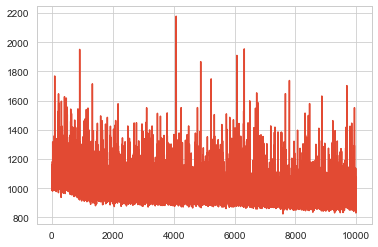

In [168]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [169]:
n_future = 90
y_pred = model.predict(X1[-n_future:])
print("**************************************************************")
print(y_pred.shape)
print("**************************************************************")

**************************************************************
(90, 1)
**************************************************************


In [170]:
y_pred_future = [x.item(0) for x in y_pred]

In [171]:
tcs_Dates = tcs_data['Date']
future_dates = pd.date_range(list(tcs_Dates)[-1], periods=n_future, freq='1d')
forcast_dates = []
for time_i in future_dates:
    forcast_dates.append(time_i.date())

In [172]:
df_forcast = pd.DataFrame({'Date': future_dates, 'Open': y_pred_future})
df_forcast['Date'] = pd.to_datetime(df_forcast['Date'])
df_forcast.head()

,Date,Open
0,2015-12-31,2731.706787
1,2016-01-01,2751.956787
2,2016-01-02,2765.998291
3,2016-01-03,2705.880615
4,2016-01-04,2609.892822


In [175]:
original = tcs_data[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-175-fbfc9f8a11f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

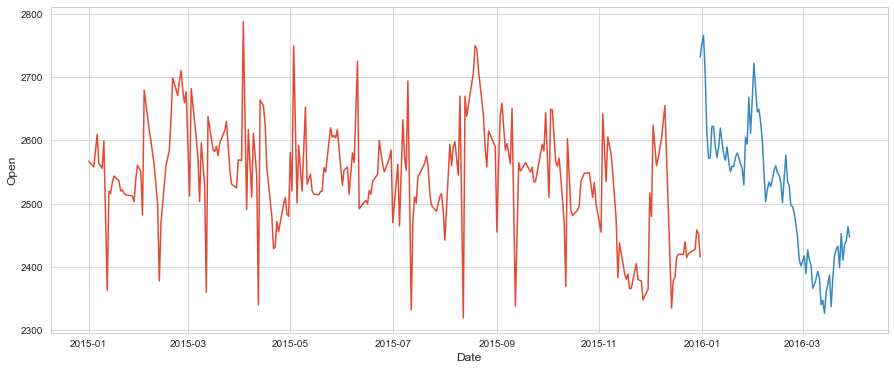

In [176]:
plt.figure(figsize = (15,6))
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forcast['Date'], df_forcast['Open'])

In [142]:
#Testing the Model
x_input = np.array([y1[x] for x in range(0,5)])
x_input = x_input.reshape((1, steps, features))
y_pred = model.predict(x_input, verbose=0)
print("**************************************************************")
print(y_pred)
print("**************************************************************")

**************************************************************
[[2532.0298]]
**************************************************************


In [ ]:
#Testing the Model
x_input = array([ 150, 160, 170, 180, 190 ])
x_input = x_input.reshape((1, steps, features))
y_pred = model.predict(x_input, verbose=0)
print("**************************************************************")
print(f"The next predicted value for the sequence {raw_sequence} is")
print(y_pred)
print("**************************************************************")

In [119]:
raw_sequence = [100, 110, 120, 130, 140, 150 ,160, 170, 180 ,190]

# choose a number of time steps
steps = 5

# split into samples
X, y = split_sequence(raw_sequence, steps)

print("**************************************************************")
print("The input raw sequence on which we will test our CNN model")
print(raw_sequence)
print("**************************************************************")
print("The features (X) ,lagged values of time series, for our CNN model")
print(X)
print("**************************************************************")
print("The respective observed values (y) of the sequence for training in CNN model")
print(y)
print("**************************************************************")

**************************************************************
The input raw sequence on which we will test our CNN model
[100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
**************************************************************
The features (X) ,lagged values of time series, for our CNN model
[[100 110 120 130 140]
 [110 120 130 140 150]
 [120 130 140 150 160]
 [130 140 150 160 170]
 [140 150 160 170 180]]
**************************************************************
The respective observed values (y) of the sequence for training in CNN model
[150 160 170 180 190]
**************************************************************


In [120]:
# reshape 2D input data to 3D input data
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping , the shape of input X")
print(X.shape)
print("**************************************************************")
print("**************************************************************")
print("The final form of input feature matrix X")
print(X)
print("**************************************************************")
print("**************************************************************")
print("Feature matrix X is ready for input to CNN model.We have used feature engineering" 
    +"to convert a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************************************")

After reshaping , the shape of input X
(5, 5, 1)
**************************************************************
**************************************************************
The final form of input feature matrix X
[[[100]
  [110]
  [120]
  [130]
  [140]]

 [[110]
  [120]
  [130]
  [140]
  [150]]

 [[120]
  [130]
  [140]
  [150]
  [160]]

 [[130]
  [140]
  [150]
  [160]
  [170]]

 [[140]
  [150]
  [160]
  [170]
  [180]]]
**************************************************************
**************************************************************
Feature matrix X is ready for input to CNN model.We have used feature engineeringto convert a sequence to matrix with image matrix shape to find patterns in sequence
**************************************************************


In [121]:
# Defining model Architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [122]:
# fit model
model.fit(X, y, epochs=10000, verbose=0)

In [123]:
#Testing the Model
x_input = array([ 150, 160, 170, 180, 190 ])
x_input = x_input.reshape((1, steps, features))
y_pred = model.predict(x_input, verbose=0)
print("**************************************************************")
print(f"The next predicted value for the sequence {raw_sequence} is")
print(y_pred)
print("**************************************************************")

**************************************************************
The next predicted value for the sequence [100, 110, 120, 130, 140, 150, 160, 170, 180, 190] is
[[200.5935]]
**************************************************************


In [124]:
X.shape

(5, 5, 1)

In [125]:
y.shape

(5,)

In [126]:
X1.shape

(245, 3)

In [127]:
y1.shape

(245,)